<h1 align="center">Data Manipulation with Python</h1>

## Instructors
- Scott Bailey
- Vincent Tompkins

## Learning objectives
By the end of this workshop, we hope you'll be able to load in data into a Pandas `DataFrame`, perform basic cleaning and analysis, and create visualizations of some relevant aspects of a dataset.  For most of this workshop we will work with a dataset prepared from the [IMDb Datasets](https://www.imdb.com/interfaces/) and the [OMDb API](https://www.omdbapi.com/).

## Topics
- What is Pandas?
  - What does Pandas do?
  - Where can I get more help with Pandas?
- Introduction to `DataFrame`s and `Series`
- Creating `DataFrame`s and loading data
  - Creating `DataFrame`s from data
  - Reading data from persistent storage
  - Writing `DataFrames` back out to persistent storage
- Working with `DataFrames`
  - Exploring `DataFrames`
  - Slicing and sub-setting
  - Operations, filtering, and assignment
  - Cleaning and manipulating `DataFrames`
  - Aggregating data
- Visualization

##  Setup

With this Google Colab notebook open, click the "Copy to Drive" button that appears in the menu bar. The notebook will then be attached to your own user account, so you can edit it in any way you like -- you can even take notes directly in the notebook.

## Zoom etiquette

Please make sure that your mic is muted during the workshop.

## Questions during the workshop

During the workshop, we have a second instructor who will be monitoring chat on Zoom. Please feel free to ask questions by chat throughout the workshop. Our second instructor will answer as able, and will aggregate questions with answers that might help everyone. 

At the end of each section of the workshop, the primary instructor will answer aggregated and new questions as time permits. If we aren't able to get to your question during the workshop, please follow up with us afterward. 

## Jupyter Notebooks and Google Colaboratory

Jupyter notebooks are a way to write and run Python code in an interactive way. They're quickly becoming a standard way of putting together data, code, and written explanations or visualizations into a single document and sharing that. There are a lot of ways that you can run Jupyter notebooks, including just locally on your computer, but we've decided to use Google's Colaboratory notebook platform for this workshop.  Colaboratory is “a Google research project created to help disseminate machine learning education and research.”  If you would like to know more about Colaboratory in general, you can visit the [Welcome Notebook](https://colab.research.google.com/notebooks/welcome.ipynb).

Using the Google Colaboratory platform allows us to focus on learning and writing Python in the workshop rather than on setting up Python, which can sometimes take a bit of extra work depending on platforms, operating systems, and other installed applications. If you'd like to install a Python distribution locally, though, we're happy to help. Feel free to drop by our walk-in consulting or schedule an appointment with us.

https://go.ncsu.edu/dvs-request


## Environment
If you would prefer to use Anaconda or your own local installation of Python or Jupyter Notebooks, for this workshop you will need an environment with the following packages installed and available:
- `pandas`
- `matplotlib`
- `sqlalchemy`
- `seaborn` (available in the `conda-forge` channel if you're on Anaconda)

Please note that we will likely not have time during the workshop to support you with problems related to a local environment, and we do recommend using the Colaboratory notebooks if you are at all unsure.



## 1. What is Pandas?

Pandas is a high-level data manipulation tool first created in 2008 by Wes McKinney.  The name is derived from the term “panel data,” an econometrics term for data sets that include observations over multiple time periods for the same individuals.<sup>[[wikipedia](https://en.wikipedia.org/wiki/Pandas_(software))]</sup>

From Jake Vanderplas’ book [**Python Data Science Handbook**](http://shop.oreilly.com/product/0636920034919.do):

> Pandas is a newer package built on top of NumPy, and provides an efficient implementation of a `DataFrame`. `DataFrame`s are essentially multidimensional arrays with attached row and column labels, and often with heterogeneous types and/or missing data. As well as offering a convenient storage interface for labeled data, Pandas implements a number of powerful data operations familiar to users of both database frameworks and spreadsheet programs.

In [1]:
import pandas as pd

# The two lines below configure how our outputs are shown in this notebook
#  environment.  They need not concern us now.
pd.set_option('display.max_rows', 20)
pd.DataFrame._repr_html_ = \
    lambda self: ('<style>table.dataframe td {white-space: nowrap}</style>' +
                  self.to_html(max_rows=10, show_dimensions=True, notebook=True))

### 1.1. What does Pandas *do*?

* Reading and writing data from persistent storage
* Cleaning, filtering, and otherwise preparing data
* Calculating statistics and analyzing data
* Visualization with help from Matplotlib

... but perhaps we should let Pandas introduce itself:

In [2]:
pd?

Type:        module
String form: <module 'pandas' from '/Users/csbaile3/projects/data-viz-workshops/lib/python3.8/site-packages/pandas/__init__.py'>
File:        ~/projects/data-viz-workshops/lib/python3.8/site-packages/pandas/__init__.py
Docstring:  
pandas - a powerful data analysis and manipulation library for Python

**pandas** is a Python package providing fast, flexible, and expressive data
structures designed to make working with "relational" or "labeled" data both
easy and intuitive. It aims to be the fundamental high-level building block for
doing practical, **real world** data analysis in Python. Additionally, it has
the broader goal of becoming **the most powerful and flexible open source data
analysis / manipulation tool available in any language**. It is already well on
its way toward this goal.

Main Features
-------------
Here are just a few of the things that pandas does well:

  - Easy handling of missing data in floating point as well as non-floating
    point data.
 

### 1.2. Where can I get more help with Pandas?

The [Pandas website](https://pandas.pydata.org/) and [online documentation](http://pandas.pydata.org/pandas-docs/stable/) are useful resources, and of course the indispensible [Stack Overflow has a "pandas" tag](https://stackoverflow.com/questions/tagged/pandas).  There is also a (much younger, much smaller) [sister site dedicated to Data Science questions that has a "pandas" tag](https://datascience.stackexchange.com/questions/tagged/pandas) too.

## 2. Introduction to `DataFrame`  s and `Series`

The main data structure that Pandas implements is the `DataFrame`, and a `DataFrame` is composed of one or more `Series` and, optionally, an `Index`.  

A `DataFrame` is a two-dimensional array with flexible row indices and flexible column names. It can be thought of as a generalization of a two-dimensional NumPy array, or a specialization of a dictionary in which each column name maps to a `Series` of column data.

A `Series` is a one-dimensional array of indexed data. It can be thought of as a specialized dictionary or a generalized NumPy array.

A `DataFrame` is made up of `Series` in a similar way in which a table is made up of columns. The only restriction is that each column must be of the same data type.  Many of the operations that can be performed on a `DataFrame` can also be performed on an individual `Series`.


<img src="https://raw.githubusercontent.com/sul-cidr/Workshops/master/Data_Manipulation_with_Python/assets/dataframes.png" alt="DataFrames are composed of Series">

## 3. Creating `DataFrame`s and loading data

There are a great many ways to create a Pandas `DataFrame` -- we can build one ourselves in lower-level Python datatypes, of course, but Pandas also provides methods to load data in from common storage and serialization formats.

<a title="PerryPlanet [Public domain], via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Bayarea_map.svg" style="float:right"><img width="256" alt="Bayarea map" src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/78/Bayarea_map.svg/512px-Bayarea_map.svg.png"></a>
### 3.1. Creating `DataFrame`s from data

The simplest way to generate a `DataFrame` is to create it directly from a `dict` of `list`s:

In [4]:
data = {
    "county": ["Alameda", "Contra Costa", "Marin", "Napa", "San Francisco", "San Mateo", "Santa Clara", "Solano", "Sonoma"],
    "county seat": ["Oakland", "Martinez", "San Rafael", "Napa", "San Francisco", "Redwood City", "San Jose", "Fairfield", "Santa Rosa"],
    "population": [1494876, 1037817, 250666, 135377, 870887, 711622, 1762754, 411620, 478551],
    "area": [2130, 2080, 2140, 2040, 600.59, 1930, 3380, 2350, 4580]
}
bay_area_counties = pd.DataFrame(data)
bay_area_counties

,county,county seat,population,area
0,Alameda,Oakland,1494876,2130.00
1,Contra Costa,Martinez,1037817,2080.00
2,Marin,San Rafael,250666,2140.00
3,Napa,Napa,135377,2040.00
4,San Francisco,San Francisco,870887,600.59
5,San Mateo,Redwood City,711622,1930.00
6,Santa Clara,San Jose,1762754,3380.00
7,Solano,Fairfield,411620,2350.00
8,Sonoma,Santa Rosa,478551,4580.00


Pandas has automatically created an `Index` on this `DataFrame` ([0..8]), but we can also specify our own `Index` when we instantiate the frame ourselves:

In [5]:
bay_area_counties = pd.DataFrame(data, index=["Ala", "Con", "Mar", "Nan", "SF", "SM", "SC", "Sol", "Son"])
bay_area_counties

,county,county seat,population,area
Ala,Alameda,Oakland,1494876,2130.00
Con,Contra Costa,Martinez,1037817,2080.00
Mar,Marin,San Rafael,250666,2140.00
Nan,Napa,Napa,135377,2040.00
SF,San Francisco,San Francisco,870887,600.59
SM,San Mateo,Redwood City,711622,1930.00
SC,Santa Clara,San Jose,1762754,3380.00
Sol,Solano,Fairfield,411620,2350.00
Son,Sonoma,Santa Rosa,478551,4580.00


This allows us to `loc`ate a specific reference using the key in the `Index`:

In [6]:
bay_area_counties.loc['Ala']

county         Alameda
county seat    Oakland
population     1494876
area              2130
Name: Ala, dtype: object

We can also set an `Index` at any time after the `DataFrame` has been created, either by adding a new index:

In [7]:
bay_area_counties = pd.DataFrame(data)
bay_area_counties.index = ["Ala", "Con", "Mar", "Nan", "SF", "SM", "SC", "Sol", "Son"]
bay_area_counties

,county,county seat,population,area
Ala,Alameda,Oakland,1494876,2130.00
Con,Contra Costa,Martinez,1037817,2080.00
Mar,Marin,San Rafael,250666,2140.00
Nan,Napa,Napa,135377,2040.00
SF,San Francisco,San Francisco,870887,600.59
SM,San Mateo,Redwood City,711622,1930.00
SC,Santa Clara,San Jose,1762754,3380.00
Sol,Solano,Fairfield,411620,2350.00
Son,Sonoma,Santa Rosa,478551,4580.00


or by choosing one of the existing columns to become the index:

In [8]:
bay_area_counties = pd.DataFrame(data)
# note the use of `inplace=True`
bay_area_counties.set_index('county', inplace=True)
bay_area_counties

,county seat,population,area
county,,,
Alameda,Oakland,1494876,2130.00
Contra Costa,Martinez,1037817,2080.00
Marin,San Rafael,250666,2140.00
Napa,Napa,135377,2040.00
San Francisco,San Francisco,870887,600.59
San Mateo,Redwood City,711622,1930.00
Santa Clara,San Jose,1762754,3380.00
Solano,Fairfield,411620,2350.00
Sonoma,Santa Rosa,478551,4580.00


In [9]:
bay_area_counties.loc['Santa Clara']

county seat    San Jose
population      1762754
area               3380
Name: Santa Clara, dtype: object

### 3.2. Reading data from persistent storage

However, most of the time we're more likely to be reading data in from an external source of some kind, and Pandas has us well covered here.

First, let's grab some data into our Colaboratory Notebook environment so that we can work with it locally:

In [11]:
!mkdir -p workshop_data
!wget https://raw.githubusercontent.com/sul-cidr/Workshops/master/Data_Manipulation_with_Python/sample_data/imdb_top_1000.csv -O workshop_data/imdb_top_1000.csv

--2020-03-30 10:12:07--  https://raw.githubusercontent.com/sul-cidr/Workshops/master/Data_Manipulation_with_Python/sample_data/imdb_top_1000.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 199.232.32.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|199.232.32.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 550239 (537K) [text/plain]
Saving to: ‘workshop_data/imdb_top_1000.csv’

workshop_data/imdb_ 100%[===================>] 537.34K  --.-KB/s    in 0.1s    

2020-03-30 10:12:07 (5.23 MB/s) - ‘workshop_data/imdb_top_1000.csv’ saved [550239/550239]



#### 3.2.1. CSV files
Reading in data from CSV files is as simple as:

In [12]:
df = pd.read_csv('workshop_data/imdb_top_1000.csv')
df

,imdbID,Title,Year,Rated,Released,Runtime,Genre,Director,Actors,Plot,Language,Country,Awards,Poster,Metascore,imdbRating,imdbVotes,BoxOffice,Production,RottenTomatoes
0,tt0111161,The Shawshank Redemption,1994,R,14 Oct 1994,142,Drama,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Two imprisoned men bond over a number of years...,English,USA,Nominated for 7 Oscars. Another 19 wins & 32 n...,https://m.media-amazon.com/images/M/MV5BMDFkYT...,80.0,9.3,2139341.0,NaN,Columbia Pictures,90%
1,tt0068646,The Godfather,1972,R,24 Mar 1972,175,"Crime, Drama",Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Richard ...",The aging patriarch of an organized crime dyna...,"English, Italian, Latin",USA,Won 3 Oscars. Another 24 wins & 28 nominations.,https://m.media-amazon.com/images/M/MV5BM2MyNj...,100.0,9.2,1469958.0,NaN,Paramount Pictures,98%
2,tt7286456,Joker,2019,R,04 Oct 2019,121,"Crime, Drama, Thriller",Todd Phillips,"Joaquin Phoenix, Robert De Niro, Zazie Beetz, ...","A gritty character study of Arthur Fleck, a ma...",English,"USA, Canada",NaN,https://m.media-amazon.com/images/M/MV5BNGVjNW...,58.0,9.1,87202.0,NaN,Warner Bros. Pictures,77%
3,tt0468569,The Dark Knight,2008,PG-13,18 Jul 2008,152,"Action, Crime, Drama, Thriller",Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",When the menace known as The Joker emerges fro...,"English, Mandarin","USA, UK",Won 2 Oscars. Another 152 wins & 155 nominations.,https://m.media-amazon.com/images/M/MV5BMTMxNT...,84.0,9.0,2101295.0,"$533,316,061",Warner Bros. Pictures/Legendary,94%
4,tt0071562,The Godfather: Part II,1974,R,20 Dec 1974,202,"Crime, Drama",Francis Ford Coppola,"Al Pacino, Robert Duvall, Diane Keaton, Robert...",The early life and career of Vito Corleone in ...,"English, Italian, Spanish, Latin, Sicilian",USA,Won 6 Oscars. Another 11 wins & 20 nominations.,https://m.media-amazon.com/images/M/MV5BMWMwMG...,90.0,9.0,1022842.0,NaN,Paramount Pictures,97%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009,tt1563738,One Day,2011,PG-13,19 Aug 2011,107,"Drama, Romance",Lone Scherfig,"Anne Hathaway, Jim Sturgess, Tom Mison, Jodie ...",After spending the night together on the night...,English,"USA, UK",1 win & 2 nominations.,https://m.media-amazon.com/images/M/MV5BMTQ3NT...,48.0,7.0,129900.0,"$13,766,014",Focus Features,36%
1010,tt0109831,Four Weddings and a Funeral,1994,R,15 Apr 1994,117,"Comedy, Drama, Romance",Mike Newell,"Hugh Grant, James Fleet, Simon Callow, John Ha...","Over the course of five social occasions, a co...","English, British Sign Language",UK,Nominated for 2 Oscars. Another 24 wins & 23 n...,https://m.media-amazon.com/images/M/MV5BMTMyNz...,81.0,7.0,128874.0,NaN,Gramercy Pictures,96%
1011,tt1862079,Safety Not Guaranteed,2012,R,18 Oct 2012,86,"Comedy, Drama, Romance",Colin Trevorrow,"Aubrey Plaza, Lauren Carlos, Basil Harris, Mar...",Three magazine employees head out on an assign...,English,USA,7 wins & 18 nominations.,https://m.media-amazon.com/images/M/MV5BOWU3ZD...,72.0,7.0,113015.0,"$4,007,792",Film District,90%
1012,tt5439796,Logan Lucky,2017,PG-13,18 Aug 2017,118,"Comedy, Crime, Drama",Steven Soderbergh,"Farrah Mackenzie, Channing Tatum, Jim O'Heir, ...",Two brothers attempt to pull off a heist durin...,English,USA,2 wins & 9 nominations.,https://m.media-amazon.com/images/M/MV5BMTYyOD...,78.0,7.0,109785.0,"$27,696,504",Fingerprint Releasing / Bleecker Street,92%


Notice again that Pandas has created a default `Index` for this `DataFrame` -- we probably want the `imdbID` column to be the `Index`, and we can set that after import, as we did above with the `bay_area_counties` data, or we can specify it when loading the CSV initially:

In [13]:
df = pd.read_csv('workshop_data/imdb_top_1000.csv', index_col='imdbID')
df.head(4) # the `head` method defaults to five if called without an argument
                   # a `tail` method is also available with the same semantics

,Title,Year,Rated,Released,Runtime,Genre,Director,Actors,Plot,Language,Country,Awards,Poster,Metascore,imdbRating,imdbVotes,BoxOffice,Production,RottenTomatoes
imdbID,,,,,,,,,,,,,,,,,,,
tt0111161,The Shawshank Redemption,1994,R,14 Oct 1994,142,Drama,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Two imprisoned men bond over a number of years...,English,USA,Nominated for 7 Oscars. Another 19 wins & 32 n...,https://m.media-amazon.com/images/M/MV5BMDFkYT...,80.0,9.3,2139341.0,NaN,Columbia Pictures,90%
tt0068646,The Godfather,1972,R,24 Mar 1972,175,"Crime, Drama",Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Richard ...",The aging patriarch of an organized crime dyna...,"English, Italian, Latin",USA,Won 3 Oscars. Another 24 wins & 28 nominations.,https://m.media-amazon.com/images/M/MV5BM2MyNj...,100.0,9.2,1469958.0,NaN,Paramount Pictures,98%
tt7286456,Joker,2019,R,04 Oct 2019,121,"Crime, Drama, Thriller",Todd Phillips,"Joaquin Phoenix, Robert De Niro, Zazie Beetz, ...","A gritty character study of Arthur Fleck, a ma...",English,"USA, Canada",NaN,https://m.media-amazon.com/images/M/MV5BNGVjNW...,58.0,9.1,87202.0,NaN,Warner Bros. Pictures,77%
tt0468569,The Dark Knight,2008,PG-13,18 Jul 2008,152,"Action, Crime, Drama, Thriller",Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",When the menace known as The Joker emerges fro...,"English, Mandarin","USA, UK",Won 2 Oscars. Another 152 wins & 155 nominations.,https://m.media-amazon.com/images/M/MV5BMTMxNT...,84.0,9.0,2101295.0,"$533,316,061",Warner Bros. Pictures/Legendary,94%


#### 3.2.2. Reading data from JSON Files

JSON files can be loaded in a similarly straightforward way.

There are two things to note here:

1. the nature of JSON as a file format is such that the `Index` is explicit, and Pandas will set it correctly for us initially.
2. We're loading the data directly over HTTP(S) here -- Pandas `read_...` methods can accept a local file path or a URL, and Pandas will take care of fetching the data for you.

In [15]:
pd.read_json('https://raw.githubusercontent.com/NCSU-Libraries/data-viz-workshops/master/Data_Manipulation_with_Python/sample_data/imdb_top_1000.json')

,Title,Year,Rated,Released,Runtime,Genre,Director,Actors,Plot,Language,Country,Awards,Poster,Metascore,imdbRating,imdbVotes,BoxOffice,Production,RottenTomatoes
tt0111161,The Shawshank Redemption,1994,R,14 Oct 1994,142,Drama,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Two imprisoned men bond over a number of years...,English,USA,Nominated for 7 Oscars. Another 19 wins & 32 n...,https://m.media-amazon.com/images/M/MV5BMDFkYT...,80.0,9.3,2139341.0,None,Columbia Pictures,90%
tt0068646,The Godfather,1972,R,24 Mar 1972,175,"Crime, Drama",Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Richard ...",The aging patriarch of an organized crime dyna...,"English, Italian, Latin",USA,Won 3 Oscars. Another 24 wins & 28 nominations.,https://m.media-amazon.com/images/M/MV5BM2MyNj...,100.0,9.2,1469958.0,None,Paramount Pictures,98%
tt7286456,Joker,2019,R,04 Oct 2019,121,"Crime, Drama, Thriller",Todd Phillips,"Joaquin Phoenix, Robert De Niro, Zazie Beetz, ...","A gritty character study of Arthur Fleck, a ma...",English,"USA, Canada",None,https://m.media-amazon.com/images/M/MV5BNGVjNW...,58.0,9.1,87202.0,None,Warner Bros. Pictures,77%
tt0468569,The Dark Knight,2008,PG-13,18 Jul 2008,152,"Action, Crime, Drama, Thriller",Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",When the menace known as The Joker emerges fro...,"English, Mandarin","USA, UK",Won 2 Oscars. Another 152 wins & 155 nominations.,https://m.media-amazon.com/images/M/MV5BMTMxNT...,84.0,9.0,2101295.0,"$533,316,061",Warner Bros. Pictures/Legendary,94%
tt0071562,The Godfather: Part II,1974,R,20 Dec 1974,202,"Crime, Drama",Francis Ford Coppola,"Al Pacino, Robert Duvall, Diane Keaton, Robert...",The early life and career of Vito Corleone in ...,"English, Italian, Spanish, Latin, Sicilian",USA,Won 6 Oscars. Another 11 wins & 20 nominations.,https://m.media-amazon.com/images/M/MV5BMWMwMG...,90.0,9.0,1022842.0,None,Paramount Pictures,97%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt1563738,One Day,2011,PG-13,19 Aug 2011,107,"Drama, Romance",Lone Scherfig,"Anne Hathaway, Jim Sturgess, Tom Mison, Jodie ...",After spending the night together on the night...,English,"USA, UK",1 win & 2 nominations.,https://m.media-amazon.com/images/M/MV5BMTQ3NT...,48.0,7.0,129900.0,"$13,766,014",Focus Features,36%
tt0109831,Four Weddings and a Funeral,1994,R,15 Apr 1994,117,"Comedy, Drama, Romance",Mike Newell,"Hugh Grant, James Fleet, Simon Callow, John Ha...","Over the course of five social occasions, a co...","English, British Sign Language",UK,Nominated for 2 Oscars. Another 24 wins & 23 n...,https://m.media-amazon.com/images/M/MV5BMTMyNz...,81.0,7.0,128874.0,None,Gramercy Pictures,96%
tt1862079,Safety Not Guaranteed,2012,R,18 Oct 2012,86,"Comedy, Drama, Romance",Colin Trevorrow,"Aubrey Plaza, Lauren Carlos, Basil Harris, Mar...",Three magazine employees head out on an assign...,English,USA,7 wins & 18 nominations.,https://m.media-amazon.com/images/M/MV5BOWU3ZD...,72.0,7.0,113015.0,"$4,007,792",Film District,90%
tt5439796,Logan Lucky,2017,PG-13,18 Aug 2017,118,"Comedy, Crime, Drama",Steven Soderbergh,"Farrah Mackenzie, Channing Tatum, Jim O'Heir, ...",Two brothers attempt to pull off a heist durin...,English,USA,2 wins & 9 nominations.,https://m.media-amazon.com/images/M/MV5BMTYyOD...,78.0,7.0,109785.0,"$27,696,504",Fingerprint Releasing / Bleecker Street,92%


#### 3.2.3. Reading data via a SQL query

We can also load data from relational databases or other datastores that export a SQL-compatible interface.  For this example we'll download a simple SQLite database file to operate on, but Pandas’ `read_sql*` methods can accept a `connection` object that is predicated on a remote database server if required.

In [17]:
!pip install sqlalchemy
!mkdir -p workshop_data
!wget https://raw.githubusercontent.com/NCSU-Libraries/data-viz-workshops/master/Data_Manipulation_with_Python/sample_data/imdb_top_1000.sqlite -O workshop_data/imdb_top_1000.sqlite

--2020-03-30 11:13:25--  https://raw.githubusercontent.com/NCSU-Libraries/data-viz-workshops/master/Data_Manipulation_with_Python/sample_data/imdb_top_1000.sqlite
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.128.133, 151.101.64.133, 151.101.0.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.128.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 614400 (600K) [application/octet-stream]
Saving to: ‘workshop_data/imdb_top_1000.sqlite’

workshop_data/imdb_ 100%[===================>] 600.00K  --.-KB/s    in 0.1s    

2020-03-30 11:13:26 (5.57 MB/s) - ‘workshop_data/imdb_top_1000.sqlite’ saved [614400/614400]



In [18]:
from sqlalchemy import create_engine
engine = create_engine("sqlite:///workshop_data/imdb_top_1000.sqlite", echo=False)
pd.read_sql_query("SELECT * FROM imdb_top_1000;", con=engine, index_col='imdbID')

,Title,Year,Rated,Runtime,Genre,Director,Actors,Plot,Language,Country,Awards,Poster,Metascore,imdbRating,imdbVotes,BoxOffice,Production,RottenTomatoes
imdbID,,,,,,,,,,,,,,,,,,
tt0111161,The Shawshank Redemption,1994,R,142,Drama,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Two imprisoned men bond over a number of years...,English,USA,Nominated for 7 Oscars. Another 19 wins & 32 n...,https://m.media-amazon.com/images/M/MV5BMDFkYT...,80.0,9.3,"2,139,341",None,Columbia Pictures,90%
tt0068646,The Godfather,1972,R,175,"Crime, Drama",Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Richard ...",The aging patriarch of an organized crime dyna...,"English, Italian, Latin",USA,Won 3 Oscars. Another 24 wins & 28 nominations.,https://m.media-amazon.com/images/M/MV5BM2MyNj...,100.0,9.2,"1,469,958",None,Paramount Pictures,98%
tt7286456,Joker,2019,R,121,"Crime, Drama, Thriller",Todd Phillips,"Joaquin Phoenix, Robert De Niro, Zazie Beetz, ...","A gritty character study of Arthur Fleck, a ma...",English,"USA, Canada",None,https://m.media-amazon.com/images/M/MV5BNGVjNW...,58.0,9.1,"87,202",None,Warner Bros. Pictures,77%
tt0468569,The Dark Knight,2008,PG-13,152,"Action, Crime, Drama, Thriller",Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",When the menace known as The Joker emerges fro...,"English, Mandarin","USA, UK",Won 2 Oscars. Another 152 wins & 155 nominations.,https://m.media-amazon.com/images/M/MV5BMTMxNT...,84.0,9.0,"2,101,295","$533,316,061",Warner Bros. Pictures/Legendary,94%
tt5813916,The Mountain II,2016,None,135,"Action, Drama, War",Alper Caglar,"Ozan Agaç, Bedii Akin, Murat Arkin, Eylül Arular",In a desolate war zone where screams of the in...,Turkish,Turkey,None,https://m.media-amazon.com/images/M/MV5BMDdkMj...,NaN,9.0,"101,514",None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt1563738,One Day,2011,PG-13,107,"Drama, Romance",Lone Scherfig,"Anne Hathaway, Jim Sturgess, Tom Mison, Jodie ...",After spending the night together on the night...,English,"USA, UK",1 win & 2 nominations.,https://m.media-amazon.com/images/M/MV5BMTQ3NT...,48.0,7.0,"129,900","$13,766,014",Focus Features,36%
tt0109831,Four Weddings and a Funeral,1994,R,117,"Comedy, Drama, Romance",Mike Newell,"Hugh Grant, James Fleet, Simon Callow, John Ha...","Over the course of five social occasions, a co...","English, British Sign Language",UK,Nominated for 2 Oscars. Another 24 wins & 23 n...,https://m.media-amazon.com/images/M/MV5BMTMyNz...,81.0,7.0,"128,874",None,Gramercy Pictures,96%
tt1862079,Safety Not Guaranteed,2012,R,86,"Comedy, Drama, Romance",Colin Trevorrow,"Aubrey Plaza, Lauren Carlos, Basil Harris, Mar...",Three magazine employees head out on an assign...,English,USA,7 wins & 18 nominations.,https://m.media-amazon.com/images/M/MV5BOWU3ZD...,72.0,7.0,"113,015","$4,007,792",Film District,90%


#### 3.2.3. Other input formats

Pandas also has methods that allow it to read data directly from other formats, including those used by Microsoft Excel, Stata, SAS, and Google Big Query.  More details are available from the [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html).

### 3.3. Writing `DataFrames` back out to persistent storage

Pandas makes writing data to persistent storage formats similarly convenient.  Methods are available to write to most of the formats Pandas can read, including all those demonstrated above.

In [19]:
df.to_csv('workshop_data/imdb_data_2.csv')

## 4. Working with `DataFrame`s

Let's begin by loading our dataset of the top 1,000 ranked films on imDB.

In the same way that it's common to `import pandas as pd`, it's common to use `df` as an identifier for generic `DataFrame`s, especially in tutorials and demos.  For anything other than interactive sessions or throw-away scripts, however, we strongly recommend using good descriptive identifiers for your `DataFrame`s!

In [24]:
df = pd.read_csv('workshop_data/imdb_top_1000.csv', index_col='imdbID')
df.head()

,Title,Year,Rated,Released,Runtime,Genre,Director,Actors,Plot,Language,Country,Awards,Poster,Metascore,imdbRating,imdbVotes,BoxOffice,Production,RottenTomatoes
imdbID,,,,,,,,,,,,,,,,,,,
tt0111161,The Shawshank Redemption,1994,R,14 Oct 1994,142,Drama,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Two imprisoned men bond over a number of years...,English,USA,Nominated for 7 Oscars. Another 19 wins & 32 n...,https://m.media-amazon.com/images/M/MV5BMDFkYT...,80.0,9.3,2139341.0,NaN,Columbia Pictures,90%
tt0068646,The Godfather,1972,R,24 Mar 1972,175,"Crime, Drama",Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Richard ...",The aging patriarch of an organized crime dyna...,"English, Italian, Latin",USA,Won 3 Oscars. Another 24 wins & 28 nominations.,https://m.media-amazon.com/images/M/MV5BM2MyNj...,100.0,9.2,1469958.0,NaN,Paramount Pictures,98%
tt7286456,Joker,2019,R,04 Oct 2019,121,"Crime, Drama, Thriller",Todd Phillips,"Joaquin Phoenix, Robert De Niro, Zazie Beetz, ...","A gritty character study of Arthur Fleck, a ma...",English,"USA, Canada",NaN,https://m.media-amazon.com/images/M/MV5BNGVjNW...,58.0,9.1,87202.0,NaN,Warner Bros. Pictures,77%
tt0468569,The Dark Knight,2008,PG-13,18 Jul 2008,152,"Action, Crime, Drama, Thriller",Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",When the menace known as The Joker emerges fro...,"English, Mandarin","USA, UK",Won 2 Oscars. Another 152 wins & 155 nominations.,https://m.media-amazon.com/images/M/MV5BMTMxNT...,84.0,9.0,2101295.0,"$533,316,061",Warner Bros. Pictures/Legendary,94%
tt0071562,The Godfather: Part II,1974,R,20 Dec 1974,202,"Crime, Drama",Francis Ford Coppola,"Al Pacino, Robert Duvall, Diane Keaton, Robert...",The early life and career of Vito Corleone in ...,"English, Italian, Spanish, Latin, Sicilian",USA,Won 6 Oscars. Another 11 wins & 20 nominations.,https://m.media-amazon.com/images/M/MV5BMWMwMG...,90.0,9.0,1022842.0,NaN,Paramount Pictures,97%


### 4.1. Exploring `DataFrame`s

Pandas provides a host of ways to explore our data, which is especially useful when we're getting to know a new dataset or source.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1014 entries, tt0111161 to tt0472062
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           1014 non-null   object 
 1   Year            1014 non-null   int64  
 2   Rated           1013 non-null   object 
 3   Released        1014 non-null   object 
 4   Runtime         1014 non-null   int64  
 5   Genre           993 non-null    object 
 6   Director        1014 non-null   object 
 7   Actors          1014 non-null   object 
 8   Plot            1014 non-null   object 
 9   Language        1014 non-null   object 
 10  Country         1014 non-null   object 
 11  Awards          975 non-null    object 
 12  Poster          1014 non-null   object 
 13  Metascore       989 non-null    float64
 14  imdbRating      1014 non-null   float64
 15  imdbVotes       1013 non-null   float64
 16  BoxOffice       561 non-null    object 
 17  Production      999 non-n

In [22]:
df.at['tt0111161', 'Title']

'The Shawshank Redemption'

In [23]:
df.iat[0, 0]

'The Shawshank Redemption'

Accessing columns can be done using the dot notation, `df.column_name`, or the dictionary notation, `df['column_name']`.  This returns a `Series` object.

In [25]:
df.Title

imdbID
tt0111161       The Shawshank Redemption
tt0068646                  The Godfather
tt7286456                          Joker
tt0468569                The Dark Knight
tt0071562         The Godfather: Part II
                        ...             
tt1563738                        One Day
tt0109831    Four Weddings and a Funeral
tt1862079          Safety Not Guaranteed
tt5439796                    Logan Lucky
tt0472062           Charlie Wilson's War
Name: Title, Length: 1014, dtype: object

In [26]:
type(df.Title)

pandas.core.series.Series

Pandas allows us to very easily explore aspects of the dataset with a host of information methods:

In [27]:
df.Rated

imdbID
tt0111161        R
tt0068646        R
tt7286456        R
tt0468569    PG-13
tt0071562        R
             ...  
tt1563738    PG-13
tt0109831        R
tt1862079        R
tt5439796    PG-13
tt0472062        R
Name: Rated, Length: 1014, dtype: object

In [28]:
df.Rated.unique()

array(['R', 'PG-13', nan, 'Not Rated', 'PG', 'G', 'Passed', 'Approved',
       'GP', 'Unrated', 'NC-17'], dtype=object)

In [29]:
df.Rated.value_counts()

R            509
PG-13        267
PG           139
G             47
Not Rated     39
Passed         5
NC-17          4
Unrated        1
Approved       1
GP             1
Name: Rated, dtype: int64

For continuous variables, especially, we can quickly get a good handle on the distribution of the data:

In [30]:
df.imdbVotes.describe()

count    1.013000e+03
mean     3.280381e+05
std      2.707299e+05
min      8.720200e+04
25%      1.471990e+05
50%      2.299110e+05
75%      4.090420e+05
max      2.139341e+06
Name: imdbVotes, dtype: float64

### 4.2. Slicing and sub-setting
`DataFrame`s can be sliced to return a subset of the available columns -- this returns a new `DataFrame` object.

In [31]:
df[['Title', 'Director']]

,Title,Director
imdbID,,
tt0111161,The Shawshank Redemption,Frank Darabont
tt0068646,The Godfather,Francis Ford Coppola
tt7286456,Joker,Todd Phillips
tt0468569,The Dark Knight,Christopher Nolan
tt0071562,The Godfather: Part II,Francis Ford Coppola
...,...,...
tt1563738,One Day,Lone Scherfig
tt0109831,Four Weddings and a Funeral,Mike Newell
tt1862079,Safety Not Guaranteed,Colin Trevorrow


In [32]:
type(df[['Title', 'Director']])

pandas.core.frame.DataFrame

`Series` objects and other subsets of `DataFrame`s preserve the indices of the `DataFrame` from which they are derived, which makes further operations such as merging or columns manipulation possible.

`DataFrame`s are designed to operate at the column level, not at the row level. However, a subset of rows can be returned using the same slice notation that will be familiar from regular Python lists.

In [33]:
df[10:15]

,Title,Year,Rated,Released,Runtime,Genre,Director,Actors,Plot,Language,Country,Awards,Poster,Metascore,imdbRating,imdbVotes,BoxOffice,Production,RottenTomatoes
imdbID,,,,,,,,,,,,,,,,,,,
tt0060196,"The Good, the Bad and the Ugly",1966,R,29 Dec 1967,178,Western,Sergio Leone,"Eli Wallach, Clint Eastwood, Lee Van Cleef, Al...",A bounty hunting scam joins two men in an unea...,"Italian, English, Spanish","Italy, Spain, West Germany",1 win & 3 nominations.,https://m.media-amazon.com/images/M/MV5BOTQ5ND...,90.0,8.8,633868.0,NaN,United Artists,97%
tt1375666,Inception,2010,PG-13,16 Jul 2010,148,"Action, Adventure, Sci-Fi, Thriller",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",A thief who steals corporate secrets through t...,"English, Japanese, French","USA, UK",Won 4 Oscars. Another 152 wins & 204 nominations.,https://m.media-amazon.com/images/M/MV5BMjAxMz...,74.0,8.8,1871690.0,"$292,568,851",Warner Bros. Pictures,87%
tt0137523,Fight Club,1999,R,15 Oct 1999,139,Drama,David Fincher,"Edward Norton, Brad Pitt, Meat Loaf, Zach Grenier",An insomniac office worker and a devil-may-car...,English,"USA, Germany",Nominated for 1 Oscar. Another 10 wins & 34 no...,https://m.media-amazon.com/images/M/MV5BMmEzNT...,66.0,8.8,1709446.0,NaN,20th Century Fox,79%
tt0109830,Forrest Gump,1994,PG-13,06 Jul 1994,142,"Drama, Romance",Robert Zemeckis,"Tom Hanks, Rebecca Williams, Sally Field, Mich...","The presidencies of Kennedy and Johnson, the e...",English,USA,Won 6 Oscars. Another 40 wins & 67 nominations.,https://m.media-amazon.com/images/M/MV5BNWIwOD...,82.0,8.8,1642730.0,"$330,000,000",Paramount Pictures,72%
tt0120737,The Lord of the Rings: The Fellowship of the Ring,2001,PG-13,19 Dec 2001,178,"Adventure, Drama, Fantasy",Peter Jackson,"Alan Howard, Noel Appleby, Sean Astin, Sala Baker",A meek Hobbit from the Shire and eight compani...,"English, Sindarin","New Zealand, USA",Won 4 Oscars. Another 113 wins & 123 nominations.,https://m.media-amazon.com/images/M/MV5BN2EyZj...,92.0,8.8,1536125.0,"$314,000,000",New Line Cinema,91%


We can chain these operations together, as long as we remember what we are returning in each link of the chain.

In [34]:
df[10:15].Production

imdbID
tt0060196           United Artists
tt1375666    Warner Bros. Pictures
tt0137523         20th Century Fox
tt0109830       Paramount Pictures
tt0120737          New Line Cinema
Name: Production, dtype: object

In [35]:
df.Production[10:15]

imdbID
tt0060196           United Artists
tt1375666    Warner Bros. Pictures
tt0137523         20th Century Fox
tt0109830       Paramount Pictures
tt0120737          New Line Cinema
Name: Production, dtype: object

In [36]:
df[['Production']][10:15]

,Production
imdbID,
tt0060196,United Artists
tt1375666,Warner Bros. Pictures
tt0137523,20th Century Fox
tt0109830,Paramount Pictures
tt0120737,New Line Cinema


We briefly saw the `.loc` attribute above which allows selection by “label” -- that is, by value(s) in the `Index`.  `DataFrame`s also expose the `.iloc` attribute, which is for selection by (integer-based) position:

In [37]:
# .reset_index() returns a copy of the DataFrame with the default Index of simple ordinals.
df[["Title", "Plot"]].reset_index().iloc[2:5]

,imdbID,Title,Plot
2,tt7286456,Joker,"A gritty character study of Arthur Fleck, a ma..."
3,tt0468569,The Dark Knight,When the menace known as The Joker emerges fro...
4,tt0071562,The Godfather: Part II,The early life and career of Vito Corleone in ...


In [38]:
df[["Title", "Plot"]].loc['tt7286456':'tt0071562']

,Title,Plot
imdbID,,
tt7286456,Joker,"A gritty character study of Arthur Fleck, a ma..."
tt0468569,The Dark Knight,When the menace known as The Joker emerges fro...
tt0071562,The Godfather: Part II,The early life and career of Vito Corleone in ...


Notice how in the `.iloc` example, record #5 is omitted, in usual python slice fashion, but in the `.loc` example, the observation with `imdbID == tt0071562` is *included* in the result.

#### 4.2.1 Copying and sorting `DataFrame`s

`DataFrame`s provide the `.sort_values()` method to allow sorting on multiple columns.  Typically we want to sort our data temporarily at time of output -- either as we’re displaying or saving it:

In [39]:
df.sort_values('Year', ascending=False)

,Title,Year,Rated,Released,Runtime,Genre,Director,Actors,Plot,Language,Country,Awards,Poster,Metascore,imdbRating,imdbVotes,BoxOffice,Production,RottenTomatoes
imdbID,,,,,,,,,,,,,,,,,,,
tt0437086,Alita: Battle Angel,2019,PG-13,14 Feb 2019,122,"Action, Adventure, Sci-Fi, Thriller",Robert Rodriguez,"Rosa Salazar, Christoph Waltz, Jennifer Connel...","A deactivated cyborg is revived, but cannot re...","English, Spanish",USA,NaN,https://m.media-amazon.com/images/M/MV5BNzVhMj...,53.0,7.4,163225.0,NaN,20th Century Fox,61%
tt6139732,Aladdin,2019,PG,24 May 2019,128,"Adventure, Family, Fantasy, Musical, Romance",Guy Ritchie,"Will Smith, Mena Massoud, Naomi Scott, Marwan ...",A kind-hearted street urchin and a power-hungr...,"Arabic, English",USA,NaN,https://m.media-amazon.com/images/M/MV5BMjQ2OD...,53.0,7.1,133674.0,NaN,NaN,NaN
tt4154796,Avengers: Endgame,2019,PG-13,26 Apr 2019,181,"Action, Adventure, Sci-Fi","Anthony Russo, Joe Russo","Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",After the devastating events of Avengers: Infi...,"English, Japanese, Xhosa","USA, UK, Canada",NaN,https://m.media-amazon.com/images/M/MV5BMTc5MD...,78.0,8.6,561813.0,NaN,Marvel Studios,94%
tt1979376,Toy Story 4,2019,G,21 Jun 2019,100,"Animation, Adventure, Comedy, Family, Fantasy",Josh Cooley,"Tom Hanks, Tim Allen, Annie Potts, Tony Hale","When a new toy called ""Forky"" joins Woody and ...",English,USA,NaN,https://m.media-amazon.com/images/M/MV5BMTYzMD...,84.0,8.1,96147.0,NaN,Disney/Pixar,97%
tt6146586,John Wick: Chapter 3 - Parabellum,2019,R,17 May 2019,131,"Action, Crime, Thriller",Chad Stahelski,"Keanu Reeves, Halle Berry, Ian McShane, Lauren...",Super-assassin John Wick is on the run after k...,"Mandarin, Latin, English, Russian, Japanese, I...",USA,NaN,https://m.media-amazon.com/images/M/MV5BMDg2Yz...,73.0,7.6,166855.0,NaN,Lionsgate,90%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt0027977,Modern Times,1936,G,25 Feb 1936,87,"Comedy, Drama, Family, Romance",Charles Chaplin,"Charles Chaplin, Paulette Goddard, Henry Bergm...",The Tramp struggles to live in modern industri...,English,USA,4 wins & 1 nomination.,https://m.media-amazon.com/images/M/MV5BYjJiZj...,96.0,8.5,195540.0,NaN,United Artists,100%
tt0021749,City Lights,1931,G,07 Mar 1931,87,"Comedy, Drama, Romance",Charles Chaplin,"Virginia Cherrill, Florence Lee, Harry Myers, ...","With the aid of a wealthy erratic tippler, a d...",English,USA,3 wins.,https://m.media-amazon.com/images/M/MV5BY2I4Mm...,99.0,8.5,151081.0,NaN,United Artists,98%
tt0022100,M,1931,Not Rated,31 Aug 1931,99,"Crime, Mystery, Thriller",Fritz Lang,"Peter Lorre, Ellen Widmann, Inge Landgut, Otto...",When the police in a German city are unable to...,German,Germany,2 wins.,https://m.media-amazon.com/images/M/MV5BODA4OD...,NaN,8.3,130914.0,"$17,599",Foremco,100%


However, sometimes we actually want to change the way in which the observations are ordered in a `DataFrame` in a way which persists, and we can do this using the `inplace=True` argument to the `.sort_values()` method.

To demonstrate this, we're going to reset the index on the `DataFrame` so that observations are given a simple ordinal index.  Since we don't want to change our `DataFrame` for the following examples, we'll make a `.copy()` to operate on.

In [40]:
df_copy = df.copy()
df_copy.reset_index(inplace=True)
df_copy.head(5)

,imdbID,Title,Year,Rated,Released,Runtime,Genre,Director,Actors,Plot,Language,Country,Awards,Poster,Metascore,imdbRating,imdbVotes,BoxOffice,Production,RottenTomatoes
0,tt0111161,The Shawshank Redemption,1994,R,14 Oct 1994,142,Drama,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Two imprisoned men bond over a number of years...,English,USA,Nominated for 7 Oscars. Another 19 wins & 32 n...,https://m.media-amazon.com/images/M/MV5BMDFkYT...,80.0,9.3,2139341.0,NaN,Columbia Pictures,90%
1,tt0068646,The Godfather,1972,R,24 Mar 1972,175,"Crime, Drama",Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Richard ...",The aging patriarch of an organized crime dyna...,"English, Italian, Latin",USA,Won 3 Oscars. Another 24 wins & 28 nominations.,https://m.media-amazon.com/images/M/MV5BM2MyNj...,100.0,9.2,1469958.0,NaN,Paramount Pictures,98%
2,tt7286456,Joker,2019,R,04 Oct 2019,121,"Crime, Drama, Thriller",Todd Phillips,"Joaquin Phoenix, Robert De Niro, Zazie Beetz, ...","A gritty character study of Arthur Fleck, a ma...",English,"USA, Canada",NaN,https://m.media-amazon.com/images/M/MV5BNGVjNW...,58.0,9.1,87202.0,NaN,Warner Bros. Pictures,77%
3,tt0468569,The Dark Knight,2008,PG-13,18 Jul 2008,152,"Action, Crime, Drama, Thriller",Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",When the menace known as The Joker emerges fro...,"English, Mandarin","USA, UK",Won 2 Oscars. Another 152 wins & 155 nominations.,https://m.media-amazon.com/images/M/MV5BMTMxNT...,84.0,9.0,2101295.0,"$533,316,061",Warner Bros. Pictures/Legendary,94%
4,tt0071562,The Godfather: Part II,1974,R,20 Dec 1974,202,"Crime, Drama",Francis Ford Coppola,"Al Pacino, Robert Duvall, Diane Keaton, Robert...",The early life and career of Vito Corleone in ...,"English, Italian, Spanish, Latin, Sicilian",USA,Won 6 Oscars. Another 11 wins & 20 nominations.,https://m.media-amazon.com/images/M/MV5BMWMwMG...,90.0,9.0,1022842.0,NaN,Paramount Pictures,97%


In [41]:
df_copy.sort_values(['Year'], ascending=False, inplace=True)
df_copy.head(5)

,imdbID,Title,Year,Rated,Released,Runtime,Genre,Director,Actors,Plot,Language,Country,Awards,Poster,Metascore,imdbRating,imdbVotes,BoxOffice,Production,RottenTomatoes
686,tt0437086,Alita: Battle Angel,2019,PG-13,14 Feb 2019,122,"Action, Adventure, Sci-Fi, Thriller",Robert Rodriguez,"Rosa Salazar, Christoph Waltz, Jennifer Connel...","A deactivated cyborg is revived, but cannot re...","English, Spanish",USA,NaN,https://m.media-amazon.com/images/M/MV5BNzVhMj...,53.0,7.4,163225.0,NaN,20th Century Fox,61%
945,tt6139732,Aladdin,2019,PG,24 May 2019,128,"Adventure, Family, Fantasy, Musical, Romance",Guy Ritchie,"Will Smith, Mena Massoud, Naomi Scott, Marwan ...",A kind-hearted street urchin and a power-hungr...,"Arabic, English",USA,NaN,https://m.media-amazon.com/images/M/MV5BMjQ2OD...,53.0,7.1,133674.0,NaN,NaN,NaN
23,tt4154796,Avengers: Endgame,2019,PG-13,26 Apr 2019,181,"Action, Adventure, Sci-Fi","Anthony Russo, Joe Russo","Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",After the devastating events of Avengers: Infi...,"English, Japanese, Xhosa","USA, UK, Canada",NaN,https://m.media-amazon.com/images/M/MV5BMTc5MD...,78.0,8.6,561813.0,NaN,Marvel Studios,94%
150,tt1979376,Toy Story 4,2019,G,21 Jun 2019,100,"Animation, Adventure, Comedy, Family, Fantasy",Josh Cooley,"Tom Hanks, Tim Allen, Annie Potts, Tony Hale","When a new toy called ""Forky"" joins Woody and ...",English,USA,NaN,https://m.media-amazon.com/images/M/MV5BMTYzMD...,84.0,8.1,96147.0,NaN,Disney/Pixar,97%
548,tt6146586,John Wick: Chapter 3 - Parabellum,2019,R,17 May 2019,131,"Action, Crime, Thriller",Chad Stahelski,"Keanu Reeves, Halle Berry, Ian McShane, Lauren...",Super-assassin John Wick is on the run after k...,"Mandarin, Latin, English, Russian, Japanese, I...",USA,NaN,https://m.media-amazon.com/images/M/MV5BMDg2Yz...,73.0,7.6,166855.0,NaN,Lionsgate,90%


It is also possible to sort by multiple columns at once:

(Notice how the `ascending` kwarg takes a list that applies to the list of columns to sort on in corresponding order.)

In [42]:
df_copy.sort_values(['Year', 'Title'], ascending=[False, True]).head(10)

,imdbID,Title,Year,Rated,Released,Runtime,Genre,Director,Actors,Plot,Language,Country,Awards,Poster,Metascore,imdbRating,imdbVotes,BoxOffice,Production,RottenTomatoes
945,tt6139732,Aladdin,2019,PG,24 May 2019,128,"Adventure, Family, Fantasy, Musical, Romance",Guy Ritchie,"Will Smith, Mena Massoud, Naomi Scott, Marwan ...",A kind-hearted street urchin and a power-hungr...,"Arabic, English",USA,NaN,https://m.media-amazon.com/images/M/MV5BMjQ2OD...,53.0,7.1,133674.0,NaN,NaN,NaN
686,tt0437086,Alita: Battle Angel,2019,PG-13,14 Feb 2019,122,"Action, Adventure, Sci-Fi, Thriller",Robert Rodriguez,"Rosa Salazar, Christoph Waltz, Jennifer Connel...","A deactivated cyborg is revived, but cannot re...","English, Spanish",USA,NaN,https://m.media-amazon.com/images/M/MV5BNzVhMj...,53.0,7.4,163225.0,NaN,20th Century Fox,61%
23,tt4154796,Avengers: Endgame,2019,PG-13,26 Apr 2019,181,"Action, Adventure, Sci-Fi","Anthony Russo, Joe Russo","Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",After the devastating events of Avengers: Infi...,"English, Japanese, Xhosa","USA, UK, Canada",NaN,https://m.media-amazon.com/images/M/MV5BMTc5MD...,78.0,8.6,561813.0,NaN,Marvel Studios,94%
991,tt4154664,Captain Marvel,2019,PG-13,08 Mar 2019,123,"Action, Adventure, Sci-Fi","Anna Boden, Ryan Fleck","Brie Larson, Samuel L. Jackson, Ben Mendelsohn...",Carol Danvers becomes one of the universe's mo...,English,"USA, Australia",NaN,https://m.media-amazon.com/images/M/MV5BMTE0YW...,64.0,7.0,359923.0,NaN,Marvel Studios,78%
548,tt6146586,John Wick: Chapter 3 - Parabellum,2019,R,17 May 2019,131,"Action, Crime, Thriller",Chad Stahelski,"Keanu Reeves, Halle Berry, Ian McShane, Lauren...",Super-assassin John Wick is on the run after k...,"Mandarin, Latin, English, Russian, Japanese, I...",USA,NaN,https://m.media-amazon.com/images/M/MV5BMDg2Yz...,73.0,7.6,166855.0,NaN,Lionsgate,90%
2,tt7286456,Joker,2019,R,04 Oct 2019,121,"Crime, Drama, Thriller",Todd Phillips,"Joaquin Phoenix, Robert De Niro, Zazie Beetz, ...","A gritty character study of Arthur Fleck, a ma...",English,"USA, Canada",NaN,https://m.media-amazon.com/images/M/MV5BNGVjNW...,58.0,9.1,87202.0,NaN,Warner Bros. Pictures,77%
256,tt7131622,Once Upon a Time... in Hollywood,2019,R,26 Jul 2019,161,"Comedy, Drama",Quentin Tarantino,"Leonardo DiCaprio, Brad Pitt, Margot Robbie, E...",A faded television actor and his stunt double ...,"English, Italian, Spanish","USA, UK, China",NaN,https://m.media-amazon.com/images/M/MV5BOTg4ZT...,83.0,8.0,200902.0,NaN,Columbia Pictures,85%
852,tt0448115,Shazam!,2019,PG-13,05 Apr 2019,132,"Action, Adventure, Comedy, Fantasy",David F. Sandberg,"Zachary Levi, Mark Strong, Asher Angel, Jack D...","We all have a superhero inside us, it just tak...",English,USA,NaN,https://m.media-amazon.com/images/M/MV5BYTE0Yj...,70.0,7.2,175979.0,NaN,New Line Cinema,90%
450,tt6320628,Spider-Man: Far from Home,2019,PG-13,02 Jul 2019,129,"Action, Adventure, Sci-Fi",Jon Watts,"Tom Holland, Samuel L. Jackson, Jake Gyllenhaa...",Following the events of Avengers: Endgame (201...,"Italian, Czech, English",USA,NaN,https://m.media-amazon.com/images/M/MV5BMGZlNT...,69.0,7.7,187214.0,NaN,Sony Pictures,90%
977,tt6105098,The Lion King,2019,PG,19 Jul 2019,118,"Animation, Adventure, Drama, Family, Musical",Jon Favreau,"Chiwetel Ejiofor, John Oliver, James Earl Jone...","After the murder of his father, a young lion p...",English,USA,NaN,https://m.media-amazon.com/images/M/MV5BMjIwMj...,55.0,7.1,102621.0,NaN,Walt Disney Pictures,53%


Notice too that since we didn't use `inplace=True` in the previous example, our `DataFrame` remains sorted as before:

In [43]:
df_copy.head(10)

,imdbID,Title,Year,Rated,Released,Runtime,Genre,Director,Actors,Plot,Language,Country,Awards,Poster,Metascore,imdbRating,imdbVotes,BoxOffice,Production,RottenTomatoes
686,tt0437086,Alita: Battle Angel,2019,PG-13,14 Feb 2019,122,"Action, Adventure, Sci-Fi, Thriller",Robert Rodriguez,"Rosa Salazar, Christoph Waltz, Jennifer Connel...","A deactivated cyborg is revived, but cannot re...","English, Spanish",USA,NaN,https://m.media-amazon.com/images/M/MV5BNzVhMj...,53.0,7.4,163225.0,NaN,20th Century Fox,61%
945,tt6139732,Aladdin,2019,PG,24 May 2019,128,"Adventure, Family, Fantasy, Musical, Romance",Guy Ritchie,"Will Smith, Mena Massoud, Naomi Scott, Marwan ...",A kind-hearted street urchin and a power-hungr...,"Arabic, English",USA,NaN,https://m.media-amazon.com/images/M/MV5BMjQ2OD...,53.0,7.1,133674.0,NaN,NaN,NaN
23,tt4154796,Avengers: Endgame,2019,PG-13,26 Apr 2019,181,"Action, Adventure, Sci-Fi","Anthony Russo, Joe Russo","Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",After the devastating events of Avengers: Infi...,"English, Japanese, Xhosa","USA, UK, Canada",NaN,https://m.media-amazon.com/images/M/MV5BMTc5MD...,78.0,8.6,561813.0,NaN,Marvel Studios,94%
150,tt1979376,Toy Story 4,2019,G,21 Jun 2019,100,"Animation, Adventure, Comedy, Family, Fantasy",Josh Cooley,"Tom Hanks, Tim Allen, Annie Potts, Tony Hale","When a new toy called ""Forky"" joins Woody and ...",English,USA,NaN,https://m.media-amazon.com/images/M/MV5BMTYzMD...,84.0,8.1,96147.0,NaN,Disney/Pixar,97%
548,tt6146586,John Wick: Chapter 3 - Parabellum,2019,R,17 May 2019,131,"Action, Crime, Thriller",Chad Stahelski,"Keanu Reeves, Halle Berry, Ian McShane, Lauren...",Super-assassin John Wick is on the run after k...,"Mandarin, Latin, English, Russian, Japanese, I...",USA,NaN,https://m.media-amazon.com/images/M/MV5BMDg2Yz...,73.0,7.6,166855.0,NaN,Lionsgate,90%
256,tt7131622,Once Upon a Time... in Hollywood,2019,R,26 Jul 2019,161,"Comedy, Drama",Quentin Tarantino,"Leonardo DiCaprio, Brad Pitt, Margot Robbie, E...",A faded television actor and his stunt double ...,"English, Italian, Spanish","USA, UK, China",NaN,https://m.media-amazon.com/images/M/MV5BOTg4ZT...,83.0,8.0,200902.0,NaN,Columbia Pictures,85%
852,tt0448115,Shazam!,2019,PG-13,05 Apr 2019,132,"Action, Adventure, Comedy, Fantasy",David F. Sandberg,"Zachary Levi, Mark Strong, Asher Angel, Jack D...","We all have a superhero inside us, it just tak...",English,USA,NaN,https://m.media-amazon.com/images/M/MV5BYTE0Yj...,70.0,7.2,175979.0,NaN,New Line Cinema,90%
450,tt6320628,Spider-Man: Far from Home,2019,PG-13,02 Jul 2019,129,"Action, Adventure, Sci-Fi",Jon Watts,"Tom Holland, Samuel L. Jackson, Jake Gyllenhaa...",Following the events of Avengers: Endgame (201...,"Italian, Czech, English",USA,NaN,https://m.media-amazon.com/images/M/MV5BMGZlNT...,69.0,7.7,187214.0,NaN,Sony Pictures,90%
977,tt6105098,The Lion King,2019,PG,19 Jul 2019,118,"Animation, Adventure, Drama, Family, Musical",Jon Favreau,"Chiwetel Ejiofor, John Oliver, James Earl Jone...","After the murder of his father, a young lion p...",English,USA,NaN,https://m.media-amazon.com/images/M/MV5BMjIwMj...,55.0,7.1,102621.0,NaN,Walt Disney Pictures,53%
991,tt4154664,Captain Marvel,2019,PG-13,08 Mar 2019,123,"Action, Adventure, Sci-Fi","Anna Boden, Ryan Fleck","Brie Larson, Samuel L. Jackson, Ben Mendelsohn...",Carol Danvers becomes one of the universe's mo...,English,"USA, Australia",NaN,https://m.media-amazon.com/images/M/MV5BMTE0YW...,64.0,7.0,359923.0,NaN,Marvel Studios,78%


#### 4.2.2 Activity

Given the `DataFrame` defined above, write an expression to extract a `DataFrame` with the columns `Title`, `Year`, `imdbRating`, and `imdbVotes`. Show the first 5 rows in order of highest rating and then most votes.

In [45]:
# Write your code here
df[["Title", "Year", "imdbRating", "imdbVotes"]].sort_values(["imdbRating", "imdbVotes"], ascending=[False, False])

,Title,Year,imdbRating,imdbVotes
imdbID,,,,
tt0111161,The Shawshank Redemption,1994,9.3,2139341.0
tt0068646,The Godfather,1972,9.2,1469958.0
tt7286456,Joker,2019,9.1,87202.0
tt0468569,The Dark Knight,2008,9.0,2101295.0
tt0071562,The Godfather: Part II,1974,9.0,1022842.0
...,...,...,...,...
tt1563738,One Day,2011,7.0,129900.0
tt0109831,Four Weddings and a Funeral,1994,7.0,128874.0
tt1862079,Safety Not Guaranteed,2012,7.0,113015.0


### 4.3. Operations, filtering, and assignment

Operations performed on a column, or `Series`, are broadcast to each of the elements.

In [46]:
# convert the running times to hours
df.Runtime / 60

imdbID
tt0111161    2.366667
tt0068646    2.916667
tt7286456    2.016667
tt0468569    2.533333
tt0071562    3.366667
               ...   
tt1563738    1.783333
tt0109831    1.950000
tt1862079    1.433333
tt5439796    1.966667
tt0472062    1.700000
Name: Runtime, Length: 1014, dtype: float64

Simple string concatenation can be performed in the same manner:

In [47]:
df.Title + '(' + df.Rated + '), directed by: ' + df.Director

imdbID
tt0111161    The Shawshank Redemption(R), directed by: Fran...
tt0068646    The Godfather(R), directed by: Francis Ford Co...
tt7286456                 Joker(R), directed by: Todd Phillips
tt0468569    The Dark Knight(PG-13), directed by: Christoph...
tt0071562    The Godfather: Part II(R), directed by: Franci...
                                   ...                        
tt1563738           One Day(PG-13), directed by: Lone Scherfig
tt0109831    Four Weddings and a Funeral(R), directed by: M...
tt1862079    Safety Not Guaranteed(R), directed by: Colin T...
tt5439796    Logan Lucky(PG-13), directed by: Steven Soderb...
tt0472062    Charlie Wilson's War(R), directed by: Mike Nic...
Length: 1014, dtype: object

as can boolean operations:

In [48]:
df.Year < 2000

imdbID
tt0111161     True
tt0068646     True
tt7286456    False
tt0468569    False
tt0071562     True
             ...  
tt1563738    False
tt0109831     True
tt1862079    False
tt5439796    False
tt0472062    False
Name: Year, Length: 1014, dtype: bool

By itself this is not terribly useful, but expressions of this kind are very powerful when passed to a `DataFrame` to select content:

In [49]:
df[df.Production == 'Paramount Pictures']

,Title,Year,Rated,Released,Runtime,Genre,Director,Actors,Plot,Language,Country,Awards,Poster,Metascore,imdbRating,imdbVotes,BoxOffice,Production,RottenTomatoes
imdbID,,,,,,,,,,,,,,,,,,,
tt0068646,The Godfather,1972,R,24 Mar 1972,175,"Crime, Drama",Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Richard ...",The aging patriarch of an organized crime dyna...,"English, Italian, Latin",USA,Won 3 Oscars. Another 24 wins & 28 nominations.,https://m.media-amazon.com/images/M/MV5BM2MyNj...,100.0,9.2,1469958.0,NaN,Paramount Pictures,98%
tt0071562,The Godfather: Part II,1974,R,20 Dec 1974,202,"Crime, Drama",Francis Ford Coppola,"Al Pacino, Robert Duvall, Diane Keaton, Robert...",The early life and career of Vito Corleone in ...,"English, Italian, Spanish, Latin, Sicilian",USA,Won 6 Oscars. Another 11 wins & 20 nominations.,https://m.media-amazon.com/images/M/MV5BMWMwMG...,90.0,9.0,1022842.0,NaN,Paramount Pictures,97%
tt0109830,Forrest Gump,1994,PG-13,06 Jul 1994,142,"Drama, Romance",Robert Zemeckis,"Tom Hanks, Rebecca Williams, Sally Field, Mich...","The presidencies of Kennedy and Johnson, the e...",English,USA,Won 6 Oscars. Another 40 wins & 67 nominations.,https://m.media-amazon.com/images/M/MV5BNWIwOD...,82.0,8.8,1642730.0,"$330,000,000",Paramount Pictures,72%
tt0816692,Interstellar,2014,PG-13,07 Nov 2014,169,"Adventure, Drama, Sci-Fi",Christopher Nolan,"Ellen Burstyn, Matthew McConaughey, Mackenzie ...",A team of explorers travel through a wormhole ...,English,"USA, UK, Canada",Won 1 Oscar. Another 43 wins & 143 nominations.,https://m.media-amazon.com/images/M/MV5BZjdkOT...,74.0,8.6,1333291.0,"$158,737,441",Paramount Pictures,72%
tt0120815,Saving Private Ryan,1998,R,24 Jul 1998,169,"Drama, War",Steven Spielberg,"Tom Hanks, Tom Sizemore, Edward Burns, Barry P...","Following the Normandy Landings, a group of U....","English, French, German, Czech",USA,Won 5 Oscars. Another 74 wins & 74 nominations.,https://m.media-amazon.com/images/M/MV5BZjhkMD...,91.0,8.6,1133804.0,NaN,Paramount Pictures,93%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt0800369,Thor,2011,PG-13,06 May 2011,115,"Action, Adventure, Fantasy",Kenneth Branagh,"Chris Hemsworth, Natalie Portman, Tom Hiddlest...",The powerful but arrogant god Thor is cast out...,English,USA,5 wins & 30 nominations.,https://m.media-amazon.com/images/M/MV5BOGE4Nz...,57.0,7.0,697534.0,"$181,015,141",Paramount Pictures,78%
tt0816711,World War Z,2013,PG-13,21 Jun 2013,116,"Action, Adventure, Horror, Sci-Fi, Thriller",Marc Forster,"Brad Pitt, Mireille Enos, Daniella Kertesz, Ja...",Former United Nations employee Gerry Lane trav...,"English, Spanish, Hebrew, Arabic","USA, UK, Malta",3 wins & 24 nominations.,https://m.media-amazon.com/images/M/MV5BNDQ4Yz...,63.0,7.0,561383.0,"$202,351,611",Paramount Pictures,66%
tt0317740,The Italian Job,2003,PG-13,30 May 2003,111,"Action, Crime, Thriller",F. Gary Gray,"Mark Wahlberg, Charlize Theron, Donald Sutherl...",After being betrayed and left for dead in Ital...,"English, Russian, Italian","USA, France, UK, Italy",8 wins & 7 nominations.,https://m.media-amazon.com/images/M/MV5BNDYyNz...,68.0,7.0,325897.0,"$105,996,316",Paramount Pictures,73%


In [50]:
df[df.Year < 2000]

,Title,Year,Rated,Released,Runtime,Genre,Director,Actors,Plot,Language,Country,Awards,Poster,Metascore,imdbRating,imdbVotes,BoxOffice,Production,RottenTomatoes
imdbID,,,,,,,,,,,,,,,,,,,
tt0111161,The Shawshank Redemption,1994,R,14 Oct 1994,142,Drama,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Two imprisoned men bond over a number of years...,English,USA,Nominated for 7 Oscars. Another 19 wins & 32 n...,https://m.media-amazon.com/images/M/MV5BMDFkYT...,80.0,9.3,2139341.0,NaN,Columbia Pictures,90%
tt0068646,The Godfather,1972,R,24 Mar 1972,175,"Crime, Drama",Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Richard ...",The aging patriarch of an organized crime dyna...,"English, Italian, Latin",USA,Won 3 Oscars. Another 24 wins & 28 nominations.,https://m.media-amazon.com/images/M/MV5BM2MyNj...,100.0,9.2,1469958.0,NaN,Paramount Pictures,98%
tt0071562,The Godfather: Part II,1974,R,20 Dec 1974,202,"Crime, Drama",Francis Ford Coppola,"Al Pacino, Robert Duvall, Diane Keaton, Robert...",The early life and career of Vito Corleone in ...,"English, Italian, Spanish, Latin, Sicilian",USA,Won 6 Oscars. Another 11 wins & 20 nominations.,https://m.media-amazon.com/images/M/MV5BMWMwMG...,90.0,9.0,1022842.0,NaN,Paramount Pictures,97%
tt0050083,12 Angry Men,1957,Not Rated,10 Apr 1957,96,Drama,Sidney Lumet,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",A jury holdout attempts to prevent a miscarria...,English,USA,Nominated for 3 Oscars. Another 16 wins & 8 no...,https://m.media-amazon.com/images/M/MV5BMWU4N2...,96.0,8.9,610423.0,NaN,Criterion Collection,100%
tt0110912,Pulp Fiction,1994,R,14 Oct 1994,154,"Crime, Drama",Quentin Tarantino,"Tim Roth, Amanda Plummer, Laura Lovelace, John...","The lives of two mob hitmen, a boxer, a gangst...","English, Spanish, French",USA,Won 1 Oscar. Another 62 wins & 69 nominations.,https://m.media-amazon.com/images/M/MV5BNGNhMD...,94.0,8.9,1678445.0,NaN,Miramax Films,92%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt0116629,Independence Day,1996,PG-13,03 Jul 1996,145,"Action, Adventure, Sci-Fi",Roland Emmerich,"Will Smith, Bill Pullman, Jeff Goldblum, Mary ...",The aliens are coming and their goal is to inv...,English,USA,Won 1 Oscar. Another 34 wins & 34 nominations.,https://m.media-amazon.com/images/M/MV5BMGQwND...,59.0,7.0,502110.0,NaN,20th Century Fox,65%
tt0120616,The Mummy,1999,PG-13,07 May 1999,124,"Action, Adventure, Fantasy",Stephen Sommers,"Brendan Fraser, Rachel Weisz, John Hannah, Arn...",At an archaeological dig in the ancient city o...,"English, Egyptian (Ancient), Arabic, Chinese, ...",USA,Nominated for 1 Oscar. Another 5 wins & 19 nom...,https://m.media-amazon.com/images/M/MV5BOTJiYj...,48.0,7.0,371033.0,NaN,Universal Pictures,59%
tt0163651,American Pie,1999,R,09 Jul 1999,95,NaN,"Paul Weitz, Chris Weitz","Jason Biggs, Jennifer Coolidge, Shannon Elizab...",Four teenage boys enter a pact to lose their v...,English,USA,9 wins & 14 nominations.,https://m.media-amazon.com/images/M/MV5BMTg3OD...,58.0,7.0,356886.0,NaN,Universal Pictures,61%


Any expression that evaluates to a `Series` of boolean values (`True` or `False`) and shares the same `Index` as the source `DataFrame` can be used.  Complex conditions can be assembled using bitwise logical operators `&`, `|`, and `~` to create simple but powerful filters.

In [51]:
# returns a `Series`
df[(df.Year < 2000) & (df.imdbRating > 8)].Title

imdbID
tt0111161              The Shawshank Redemption
tt0068646                         The Godfather
tt0071562                The Godfather: Part II
tt0050083                          12 Angry Men
tt0110912                          Pulp Fiction
                            ...                
tt0074958                               Network
tt0113247                              La Haine
tt0047296                     On the Waterfront
tt0087544    Nausicaä of the Valley of the Wind
tt0032976                               Rebecca
Name: Title, Length: 124, dtype: object

In [52]:
# returns a `DataFrame`
df.loc[(df.Year < 2000) & (df.imdbRating > 8), ['Title', 'Year', 'imdbRating']]

,Title,Year,imdbRating
imdbID,,,
tt0111161,The Shawshank Redemption,1994,9.3
tt0068646,The Godfather,1972,9.2
tt0071562,The Godfather: Part II,1974,9.0
tt0050083,12 Angry Men,1957,8.9
tt0110912,Pulp Fiction,1994,8.9
...,...,...,...
tt0074958,Network,1976,8.1
tt0113247,La Haine,1995,8.1
tt0047296,On the Waterfront,1954,8.1


The `.str` property gives access to string variables in a broadcast fashion, such that they can be manipulated:

In [53]:
df.Actors.str.split(', ')

imdbID
tt0111161    [Tim Robbins, Morgan Freeman, Bob Gunton, Will...
tt0068646    [Marlon Brando, Al Pacino, James Caan, Richard...
tt7286456    [Joaquin Phoenix, Robert De Niro, Zazie Beetz,...
tt0468569    [Christian Bale, Heath Ledger, Aaron Eckhart, ...
tt0071562    [Al Pacino, Robert Duvall, Diane Keaton, Rober...
                                   ...                        
tt1563738    [Anne Hathaway, Jim Sturgess, Tom Mison, Jodie...
tt0109831    [Hugh Grant, James Fleet, Simon Callow, John H...
tt1862079    [Aubrey Plaza, Lauren Carlos, Basil Harris, Ma...
tt5439796    [Farrah Mackenzie, Channing Tatum, Jim O'Heir,...
tt0472062    [Tom Hanks, Amy Adams, Julia Roberts, Philip S...
Name: Actors, Length: 1014, dtype: object

We can make use of `.str` in expressions:

In [54]:
# select records with Oscar nominations or wins
df[df.Awards.str.contains('Oscar') == True]

,Title,Year,Rated,Released,Runtime,Genre,Director,Actors,Plot,Language,Country,Awards,Poster,Metascore,imdbRating,imdbVotes,BoxOffice,Production,RottenTomatoes
imdbID,,,,,,,,,,,,,,,,,,,
tt0111161,The Shawshank Redemption,1994,R,14 Oct 1994,142,Drama,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Two imprisoned men bond over a number of years...,English,USA,Nominated for 7 Oscars. Another 19 wins & 32 n...,https://m.media-amazon.com/images/M/MV5BMDFkYT...,80.0,9.3,2139341.0,NaN,Columbia Pictures,90%
tt0068646,The Godfather,1972,R,24 Mar 1972,175,"Crime, Drama",Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Richard ...",The aging patriarch of an organized crime dyna...,"English, Italian, Latin",USA,Won 3 Oscars. Another 24 wins & 28 nominations.,https://m.media-amazon.com/images/M/MV5BM2MyNj...,100.0,9.2,1469958.0,NaN,Paramount Pictures,98%
tt0468569,The Dark Knight,2008,PG-13,18 Jul 2008,152,"Action, Crime, Drama, Thriller",Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",When the menace known as The Joker emerges fro...,"English, Mandarin","USA, UK",Won 2 Oscars. Another 152 wins & 155 nominations.,https://m.media-amazon.com/images/M/MV5BMTMxNT...,84.0,9.0,2101295.0,"$533,316,061",Warner Bros. Pictures/Legendary,94%
tt0071562,The Godfather: Part II,1974,R,20 Dec 1974,202,"Crime, Drama",Francis Ford Coppola,"Al Pacino, Robert Duvall, Diane Keaton, Robert...",The early life and career of Vito Corleone in ...,"English, Italian, Spanish, Latin, Sicilian",USA,Won 6 Oscars. Another 11 wins & 20 nominations.,https://m.media-amazon.com/images/M/MV5BMWMwMG...,90.0,9.0,1022842.0,NaN,Paramount Pictures,97%
tt0050083,12 Angry Men,1957,Not Rated,10 Apr 1957,96,Drama,Sidney Lumet,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",A jury holdout attempts to prevent a miscarria...,English,USA,Nominated for 3 Oscars. Another 16 wins & 8 no...,https://m.media-amazon.com/images/M/MV5BMWU4N2...,96.0,8.9,610423.0,NaN,Criterion Collection,100%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt1587310,Maleficent,2014,PG,30 May 2014,97,"Action, Adventure, Family, Fantasy, Romance",Robert Stromberg,"Angelina Jolie, Elle Fanning, Sharlto Copley, ...",A vengeful fairy is driven to curse an infant ...,English,USA,Nominated for 1 Oscar. Another 10 wins & 42 no...,https://m.media-amazon.com/images/M/MV5BMjAwMz...,56.0,7.0,311641.0,"$190,871,149",Walt Disney Pictures,53%
tt0099653,Ghost,1990,PG-13,13 Jul 1990,127,"Drama, Fantasy, Romance, Thriller",Jerry Zucker,"Patrick Swayze, Demi Moore, Tony Goldwyn, Stan...","After a young man is murdered, his spirit stay...",English,USA,Won 2 Oscars. Another 16 wins & 23 nominations.,https://m.media-amazon.com/images/M/MV5BMTU0Nz...,52.0,7.0,182270.0,NaN,Paramount Pictures,74%
tt0461770,Enchanted,2007,PG,21 Nov 2007,107,"Animation, Comedy, Family, Fantasy, Musical, R...",Kevin Lima,"Amy Adams, Patrick Dempsey, James Marsden, Tim...","A young maiden in a land called Andalasia, who...",English,USA,Nominated for 3 Oscars. Another 12 wins & 48 n...,https://m.media-amazon.com/images/M/MV5BMjE4ND...,75.0,7.0,166896.0,"$127,706,877",Walt Disney Pictures,93%


In [55]:
df[df.Director.apply(lambda a: len(a.split(', ')) > 3)][['Title', 'Director']]

,Title,Director
imdbID,,
tt0032138,The Wizard of Oz,"Victor Fleming, George Cukor, Mervyn LeRoy, No..."
tt3521164,Moana,"Ron Clements, John Musker, Don Hall(co-directo..."
tt0029583,Snow White and the Seven Dwarfs,"William Cottrell, David Hand, Wilfred Jackson,..."
tt0462322,Grindhouse,"Robert Rodriguez, Eli Roth, Quentin Tarantino,..."
tt0032910,Pinocchio,"Norman Ferguson, T. Hee, Wilfred Jackson, Jack..."
tt0034492,Bambi,"James Algar, Samuel Armstrong, David Hand, Gra..."
tt0046183,Peter Pan,"Clyde Geronimi, Wilfred Jackson, Hamilton Lusk..."
tt0033563,Dumbo,"Samuel Armstrong, Norman Ferguson, Wilfred Jac..."


#### 4.3.1. Assignment to `DataFrame`s

It is also possible to assign values directly to columns or cells in a data frame.

In [56]:
df_copy = df.copy()

# create a new column based on an existing one
df_copy['Runtime (hrs)'] = df_copy.Runtime / 60

# edit a single value
df_copy.at['tt0111161', 'Title'] = 'Rita Hayworth and Shawshank Redemption'

df_copy[['Title', 'Runtime', 'Runtime (hrs)']]

,Title,Runtime,Runtime (hrs)
imdbID,,,
tt0111161,Rita Hayworth and Shawshank Redemption,142,2.366667
tt0068646,The Godfather,175,2.916667
tt7286456,Joker,121,2.016667
tt0468569,The Dark Knight,152,2.533333
tt0071562,The Godfather: Part II,202,3.366667
...,...,...,...
tt1563738,One Day,107,1.783333
tt0109831,Four Weddings and a Funeral,117,1.950000
tt1862079,Safety Not Guaranteed,86,1.433333


#### 4.3.2. Activity

Returning to our “Bay Area Counties” data from earlier, write an expression to calculate the population density of each county, and assign it to a new column on the `DataFrame`. Population density is defined as the number of people per unit of area.

In [57]:
data = {
    "county": ["Alameda", "Contra Costa", "Marin", "Napa", "San Francisco", "San Mateo", "Santa Clara", "Solano", "Sonoma"],
    "county seat": ["Oakland", "Martinez", "San Rafael", "Napa", "San Francisco", "Redwood City", "San Jose", "Fairfield", "Santa Rosa"],
    "population": [1494876, 1037817, 250666, 135377, 870887, 711622, 1762754, 411620, 478551],
    "area": [2130, 2080, 2140, 2040, 600.59, 1930, 3380, 2350, 4580]  # data is in km²
}
bay_area_counties = pd.DataFrame(data)
bay_area_counties

,county,county seat,population,area
0,Alameda,Oakland,1494876,2130.00
1,Contra Costa,Martinez,1037817,2080.00
2,Marin,San Rafael,250666,2140.00
3,Napa,Napa,135377,2040.00
4,San Francisco,San Francisco,870887,600.59
5,San Mateo,Redwood City,711622,1930.00
6,Santa Clara,San Jose,1762754,3380.00
7,Solano,Fairfield,411620,2350.00
8,Sonoma,Santa Rosa,478551,4580.00


In [58]:
# Write your code here
bay_area_counties["population_density"] = bay_area_counties.population / bay_area_counties.area
bay_area_counties.head()

,county,county seat,population,area,population_density
0,Alameda,Oakland,1494876,2130.00,701.819718
1,Contra Costa,Martinez,1037817,2080.00,498.950481
2,Marin,San Rafael,250666,2140.00,117.133645
3,Napa,Napa,135377,2040.00,66.361275
4,San Francisco,San Francisco,870887,600.59,1450.052448


### 4.4. Cleaning and manipulating `DataFrame`s

#### 4.4.1. Converting data types

Pandas does a pretty good job of inferring data types when we load data into a `DataFrame`, but sometimes we want or need to change the types it selects.  We can do this using the `.astype()` method on a `Series` object.

Those coming from an `R` or a statistical background may be used to working with categorical data, and we can force pandas to treat a column as categorical using `.astype('category')`:

In [59]:
df['Rated'] = df['Rated'].astype('category')
df['Rated']

imdbID
tt0111161        R
tt0068646        R
tt7286456        R
tt0468569    PG-13
tt0071562        R
             ...  
tt1563738    PG-13
tt0109831        R
tt1862079        R
tt5439796    PG-13
tt0472062        R
Name: Rated, Length: 1014, dtype: category
Categories (10, object): [Approved, G, GP, NC-17, ..., PG-13, Passed, R, Unrated]

Using `.astype('category')` invokes the default behavior, by which categories are inferred from the data and are unordered.  The only real advantage to using categories is if they are ordered, so let's quickly convert them to ordered categories:

In [60]:
from pandas.api.types import CategoricalDtype
df['Rated'] = df['Rated'].astype(CategoricalDtype(ordered=True))
df['Rated']

imdbID
tt0111161        R
tt0068646        R
tt7286456        R
tt0468569    PG-13
tt0071562        R
             ...  
tt1563738    PG-13
tt0109831        R
tt1862079        R
tt5439796    PG-13
tt0472062        R
Name: Rated, Length: 1014, dtype: category
Categories (10, object): [Approved < G < GP < NC-17 ... PG-13 < Passed < R < Unrated]

A common need is to parse dates -- if loaded from, e.g., a CSV file, they will often be interpreted as strings, as is the case with our “Released” column.

In [61]:
df['Released'].astype('datetime64')

imdbID
tt0111161   1994-10-14
tt0068646   1972-03-24
tt7286456   2019-10-04
tt0468569   2008-07-18
tt0071562   1974-12-20
               ...    
tt1563738   2011-08-19
tt0109831   1994-04-15
tt1862079   2012-10-18
tt5439796   2017-08-18
tt0472062   2007-12-21
Name: Released, Length: 1014, dtype: datetime64[ns]

In [62]:
pd.to_datetime(df['Released'])

imdbID
tt0111161   1994-10-14
tt0068646   1972-03-24
tt7286456   2019-10-04
tt0468569   2008-07-18
tt0071562   1974-12-20
               ...    
tt1563738   2011-08-19
tt0109831   1994-04-15
tt1862079   2012-10-18
tt5439796   2017-08-18
tt0472062   2007-12-21
Name: Released, Length: 1014, dtype: datetime64[ns]

In [63]:
df['Released'].apply(pd.to_datetime)

imdbID
tt0111161   1994-10-14
tt0068646   1972-03-24
tt7286456   2019-10-04
tt0468569   2008-07-18
tt0071562   1974-12-20
               ...    
tt1563738   2011-08-19
tt0109831   1994-04-15
tt1862079   2012-10-18
tt5439796   2017-08-18
tt0472062   2007-12-21
Name: Released, Length: 1014, dtype: datetime64[ns]

#### 4.4.2. `.apply()`

The fundamental way of manipulating the contents of `DataFrame`s is by using the `apply()` method.  `apply()` takes a function as an argument, and `apply`s the function to each element in the container it’s called on.

In [64]:
def count_genres_naive(text):
    genres = text.split(", ")
    return len(genres)

In [65]:
df.Genre

imdbID
tt0111161                                Drama
tt0068646                         Crime, Drama
tt7286456               Crime, Drama, Thriller
tt0468569       Action, Crime, Drama, Thriller
tt0071562                         Crime, Drama
                           ...                
tt1563738                       Drama, Romance
tt0109831               Comedy, Drama, Romance
tt1862079               Comedy, Drama, Romance
tt5439796                 Comedy, Crime, Drama
tt0472062    Biography, Comedy, Drama, History
Name: Genre, Length: 1014, dtype: object

In [66]:
df.Genre.apply(count_genres_naive)

AttributeError: 'float' object has no attribute 'split'

For the purposes of this workshop, the version of the dataset we are currently working with has had some data deliberately removed, and unfortunately our `count_genres_naive` function does not know how to handle missing data.

Pandas uses the `NaN` datatype from the underlying `numpy` package to represent missing data, and this datatype is based on the primitive `float` type, which is why the `Attribute` error reads as it does.

In [67]:
df[pd.isna(df.Genre)][['Title', 'Genre']]

,Title,Genre
imdbID,,
tt0057012,Dr. Strangelove or: How I Learned to Stop Worr...,NaN
tt0079470,Monty Python's Life of Brian,NaN
tt0072431,Young Frankenstein,NaN
tt0091042,Ferris Bueller's Day Off,NaN
tt1119646,The Hangover,NaN
...,...,...
tt0109686,Dumb and Dumber,NaN
tt0424345,Clerks II,NaN
tt0357413,Anchorman: The Legend of Ron Burgundy,NaN


We could handle this problem in a number of ways:
1. we could drop the observations with missing values immediately (and temporarily) before we apply our count function;
2. we could modify our `count_genres_naive` function to handle the missing values appropriately;
3. we could fix the data manually by assigning values where they are missing; or
4. we could clean the dataset when we initially import it.

In [68]:
df.Genre.dropna()

imdbID
tt0111161                                Drama
tt0068646                         Crime, Drama
tt7286456               Crime, Drama, Thriller
tt0468569       Action, Crime, Drama, Thriller
tt0071562                         Crime, Drama
                           ...                
tt1563738                       Drama, Romance
tt0109831               Comedy, Drama, Romance
tt1862079               Comedy, Drama, Romance
tt5439796                 Comedy, Crime, Drama
tt0472062    Biography, Comedy, Drama, History
Name: Genre, Length: 993, dtype: object

In [69]:
df.Genre.dropna().apply(count_genres_naive)

imdbID
tt0111161    1
tt0068646    2
tt7286456    3
tt0468569    4
tt0071562    2
            ..
tt1563738    2
tt0109831    3
tt1862079    3
tt5439796    3
tt0472062    4
Name: Genre, Length: 993, dtype: int64

One possible problem with this approach is that we don't get a count for the observations with missing values.  This means that if we want to enrich our original `DataFrame` with a new column containing the genre count, our count column will also be populated with `NaN`s:

In [70]:
df['Genre Count'] = df.Genre.dropna().apply(count_genres_naive)
df[pd.isna(df.Genre)][['Genre', 'Genre Count']]

,Genre,Genre Count
imdbID,,
tt0057012,NaN,NaN
tt0079470,NaN,NaN
tt0072431,NaN,NaN
tt0091042,NaN,NaN
tt1119646,NaN,NaN
...,...,...
tt0109686,NaN,NaN
tt0424345,NaN,NaN
tt0357413,NaN,NaN


In this case, we might conclude that since the data is missing, the appropriate value for “genre count” is `0`, and we can write a less naïve operator function that handles this for us:

In [71]:
def count_genres(text):
    if pd.isna(text):
        return 0
    genres = text.split(", ")
    return len(genres)

In [72]:
df['Genre Count'] = df.Genre.apply(count_genres)
df[pd.isna(df.Genre)][['Genre', 'Genre Count']]

,Genre,Genre Count
imdbID,,
tt0057012,NaN,0
tt0079470,NaN,0
tt0072431,NaN,0
tt0091042,NaN,0
tt1119646,NaN,0
...,...,...
tt0109686,NaN,0
tt0424345,NaN,0
tt0357413,NaN,0


For the sake of our workshop, however, the dataset has been modified so that `Genre` has been removed where it should be the single value “Comedy”.  Since we know, therefore, what the value should be for all observations where `Genre` is missing, we have the option to simply update the `DataFrame` directly in the following way:

In [73]:
df.loc[pd.isna(df.Genre), 'Genre'] = 'Comedy'
df[pd.isna(df.Genre)]

,Title,Year,Rated,Released,Runtime,Genre,Director,Actors,Plot,Language,Country,Awards,Poster,Metascore,imdbRating,imdbVotes,BoxOffice,Production,RottenTomatoes,Genre Count
imdbID,,,,,,,,,,,,,,,,,,,,


We might be done at this point, but it might also be a good idea to check if there are other missing values in our dataset:

In [74]:
df.isnull().sum()

Title               0
Year                0
Rated               1
Released            0
Runtime             0
Genre               0
Director            0
Actors              0
Plot                0
Language            0
Country             0
Awards             39
Poster              0
Metascore          25
imdbRating          0
imdbVotes           1
BoxOffice         453
Production         15
RottenTomatoes     18
Genre Count         0
dtype: int64

#### 4.4.3. Manipulating / cleaning on import

With this in mind, then, and especially when creating re-usable scripts for repetitive tasks or processes we want to iterate over, a common ‘best practice’ is to handle many data transformations when the `DataFrame` is first populated.

In [75]:
from pandas.api.types import CategoricalDtype
column_types = {
    'Rated': CategoricalDtype(ordered=True)
}
fill_nans = {
    'Genre': 'Comedy',
    'imdbVotes': 0,
    'Rated': 'Unrated',
    'Awards': '',
    'Metascore': '',
    'BoxOffice': '',
    'Production': '',
    'RottenTomatoes': ''
}
date_columns = ['Released']
df = pd.read_csv(
    'workshop_data/imdb_top_1000.csv',
    parse_dates=date_columns,
    index_col='imdbID',
    dtype=column_types)
df.fillna(value=fill_nans, inplace=True)
df.head(5)

,Title,Year,Rated,Released,Runtime,Genre,Director,Actors,Plot,Language,Country,Awards,Poster,Metascore,imdbRating,imdbVotes,BoxOffice,Production,RottenTomatoes
imdbID,,,,,,,,,,,,,,,,,,,
tt0111161,The Shawshank Redemption,1994,R,1994-10-14,142,Drama,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Two imprisoned men bond over a number of years...,English,USA,Nominated for 7 Oscars. Another 19 wins & 32 n...,https://m.media-amazon.com/images/M/MV5BMDFkYT...,80,9.3,2139341.0,,Columbia Pictures,90%
tt0068646,The Godfather,1972,R,1972-03-24,175,"Crime, Drama",Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Richard ...",The aging patriarch of an organized crime dyna...,"English, Italian, Latin",USA,Won 3 Oscars. Another 24 wins & 28 nominations.,https://m.media-amazon.com/images/M/MV5BM2MyNj...,100,9.2,1469958.0,,Paramount Pictures,98%
tt7286456,Joker,2019,R,2019-10-04,121,"Crime, Drama, Thriller",Todd Phillips,"Joaquin Phoenix, Robert De Niro, Zazie Beetz, ...","A gritty character study of Arthur Fleck, a ma...",English,"USA, Canada",,https://m.media-amazon.com/images/M/MV5BNGVjNW...,58,9.1,87202.0,,Warner Bros. Pictures,77%
tt0468569,The Dark Knight,2008,PG-13,2008-07-18,152,"Action, Crime, Drama, Thriller",Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",When the menace known as The Joker emerges fro...,"English, Mandarin","USA, UK",Won 2 Oscars. Another 152 wins & 155 nominations.,https://m.media-amazon.com/images/M/MV5BMTMxNT...,84,9.0,2101295.0,"$533,316,061",Warner Bros. Pictures/Legendary,94%
tt0071562,The Godfather: Part II,1974,R,1974-12-20,202,"Crime, Drama",Francis Ford Coppola,"Al Pacino, Robert Duvall, Diane Keaton, Robert...",The early life and career of Vito Corleone in ...,"English, Italian, Spanish, Latin, Sicilian",USA,Won 6 Oscars. Another 11 wins & 20 nominations.,https://m.media-amazon.com/images/M/MV5BMWMwMG...,90,9.0,1022842.0,,Paramount Pictures,97%


In [76]:
df.isnull().sum()

Title             0
Year              0
Rated             0
Released          0
Runtime           0
Genre             0
Director          0
Actors            0
Plot              0
Language          0
Country           0
Awards            0
Poster            0
Metascore         0
imdbRating        0
imdbVotes         0
BoxOffice         0
Production        0
RottenTomatoes    0
dtype: int64

#### 4.4.4. Activity

Add a new column `language_count` to the `DataFrame` and show movies with more than 1 language.

In [79]:
# Write your code here

def count_languages(text):
    languages = text.split(", ")
    return len(languages)

df["language_count"] = df.Language.apply(count_languages)
df[df.language_count > 1][["Title", "Language", "language_count"]]

,Title,Language,language_count
imdbID,,,
tt0068646,The Godfather,"English, Italian, Latin",3
tt0468569,The Dark Knight,"English, Mandarin",2
tt0071562,The Godfather: Part II,"English, Italian, Spanish, Latin, Sicilian",5
tt0110912,Pulp Fiction,"English, Spanish, French",3
tt0167260,The Lord of the Rings: The Return of the King,"English, Quenya, Old English, Sindarin",4
...,...,...,...
tt0910936,Pineapple Express,"English, Cantonese, Korean",3
tt0360486,Constantine,"English, Filipino, Tagalog",3
tt0418763,Jarhead,"English, Spanish, Arabic, Latin",4


### 4.5. Aggregating data

But what about the most-featured Director in the top 1000 list?  Or the average rating for movies classified as “Comedy”?  For these kinds of operations we need to compute across aggregations of the dataset.  In Pandas this may be accomplished by means of `.groupby()` operation followed by an `.aggregate()` function. Aggregates can be considered a form of `.apply()` that operates on a collection of observations at once (in these cases, on the collections created by `.groupby()`.

<img src="https://raw.githubusercontent.com/sul-cidr/Workshops/master/Data_Manipulation_with_Python/assets/aggregation.png" alt="Aggregation">

Those who are familiar with the `R` programming language, may recognize this as the “Split-Apply-Combine” approach:[<sup>*</sup>](#fn)
- *Split* a dataset into relevant subsets;
- *Apply* a function to each subset;
- *Combine* all the pieces back together.

<hr>
<span id="fn">* A classic paper on the Split-Apply-Combine methodology is available here: <a href="https://www.jstatsoft.org/article/view/v040i01/v40i01.pdf">“The Split-Apply-Combine Strategy for Data Analysis”</a></span>

In [80]:
df.groupby('Director')

In [81]:
df.groupby('Director')[['Title']]

In [82]:
df.groupby('Director')[['Title']].aggregate(lambda values: len(values))

,Title
Director,
"Aamir Khan, Amole Gupte",1
Aaron Sorkin,1
Abdellatif Kechiche,1
Adam Brooks,1
Adam Elliot,1
...,...
Woody Allen,6
Yimou Zhang,2
Yorgos Lanthimos,2


We can then sort on the aggregated values to show the highest (and lowest) ranking Directors among our top 1,000 movies:

In [83]:
df.groupby('Director')[['Title']].aggregate(len).sort_values(['Title'], ascending=False)

,Title
Director,
Steven Spielberg,21
Martin Scorsese,11
Ridley Scott,11
Clint Eastwood,10
Robert Zemeckis,10
...,...
Jeff Nichols,1
Jean-Pierre Jeunet,1
"Jaume Balagueró, Paco Plaza",1


If we want to aggregate across the combination of, e.g., Director and Production credit, the `.group_by()` method will accept a list of columns:

In [86]:
(df.groupby(['Director', 'Production'])[['Title']]
   .aggregate(len)
   .sort_values(['Title'], ascending=False)
   .head(10))

,,Title
Director,Production,
Christopher Nolan,Warner Bros. Pictures,5
David Yates,Warner Bros. Pictures,5
Quentin Tarantino,Miramax Films,5
Steven Spielberg,Paramount Pictures,4
Bryan Singer,20th Century Fox,4
Ron Howard,Universal Pictures,4
Ridley Scott,20th Century Fox,4
Steven Spielberg,Universal Pictures,4
Clint Eastwood,Warner Bros. Pictures,4


In [87]:
df.pivot_table(
    index=['Director', 'Production'],
    values=['Title'],
    aggfunc=len
).sort_values('Title', ascending=False).head(10)

,,Title
Director,Production,
Christopher Nolan,Warner Bros. Pictures,5
David Yates,Warner Bros. Pictures,5
Quentin Tarantino,Miramax Films,5
Steven Spielberg,Paramount Pictures,4
Bryan Singer,20th Century Fox,4
Ron Howard,Universal Pictures,4
Ridley Scott,20th Century Fox,4
Steven Spielberg,Universal Pictures,4
Clint Eastwood,Warner Bros. Pictures,4


### 4.5.1. Activity

Show the top five years for movies categorized as "Comedy".

(Hint: don't try to parse-out the different values in the “Genre” column -- just test for the presence of the word “Comedy”, e.g. `df.Genre.str.contains('Comedy')`.)

In [105]:
# Write your code here

df[df.Genre.str.contains('Comedy')].groupby('Year')[['Title']].aggregate(len).sort_values("Title", ascending=False).head()

,Title
Year,
2013,13
1999,12
2007,12
2014,11
2009,10


## 5. Visualization

Pandas also provides some utilities to create basic plots just by calling `plot()` on a `Series` or `DataFrame`. But first we need to tell Jupyter that we are going to plot some charts using the plotting library `matplotlib`.

In [103]:
# enables inline plotting in Jupyter using matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

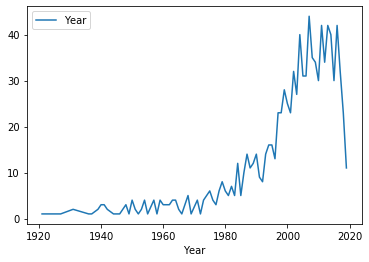

In [104]:
df.groupby('Year')[['Year']].aggregate(len).plot()

Each time you call `plot()` an `AxesSubplot` object is returned, and these are automatically rendered by the Jupyter notebook environment. `AxesSubplot` objects are objects of the underlying `matplotlib` library for plotting in Python, and as such, lots of different options can be passed to control the output.

Text(0.5, 0, 'Year of Release')

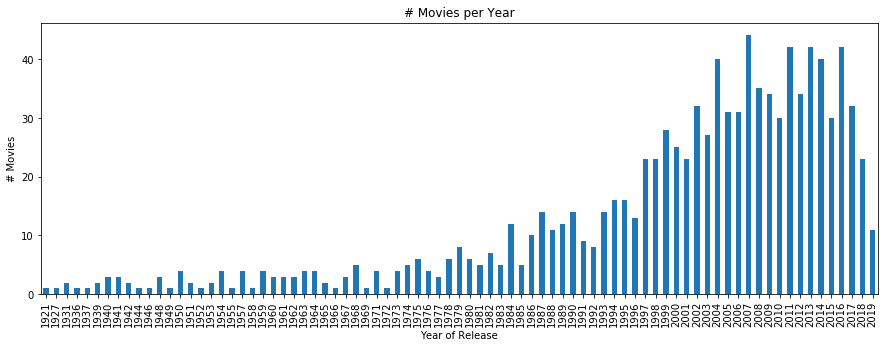

In [106]:
ax = df.groupby('Year')[['Year']].aggregate(len).plot(
    kind="bar",
    figsize=(15, 5),
    title="# Movies per Year",
    legend=None
)
ax.set_ylabel("# Movies")
ax.set_xlabel("Year of Release")

In [107]:
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

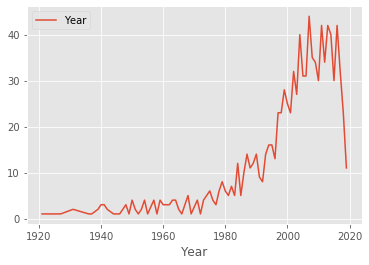

In [108]:
with plt.style.context('ggplot'):
    df.groupby('Year')[['Year']].aggregate(len).plot()

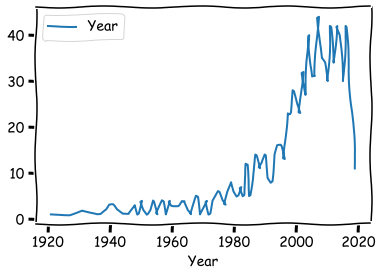

In [109]:
with plt.xkcd():
    df.groupby('Year')[['Year']].aggregate(len).plot()
plt.rcdefaults()  # this is needed as the XKCD style is a special case

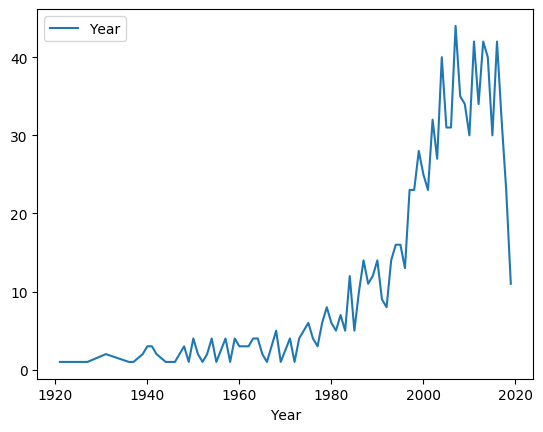

In [110]:
import seaborn as sns
df.groupby('Year')[['Year']].aggregate(len).plot()

Text(0.5, 1.0, 'Histogram of # votes')

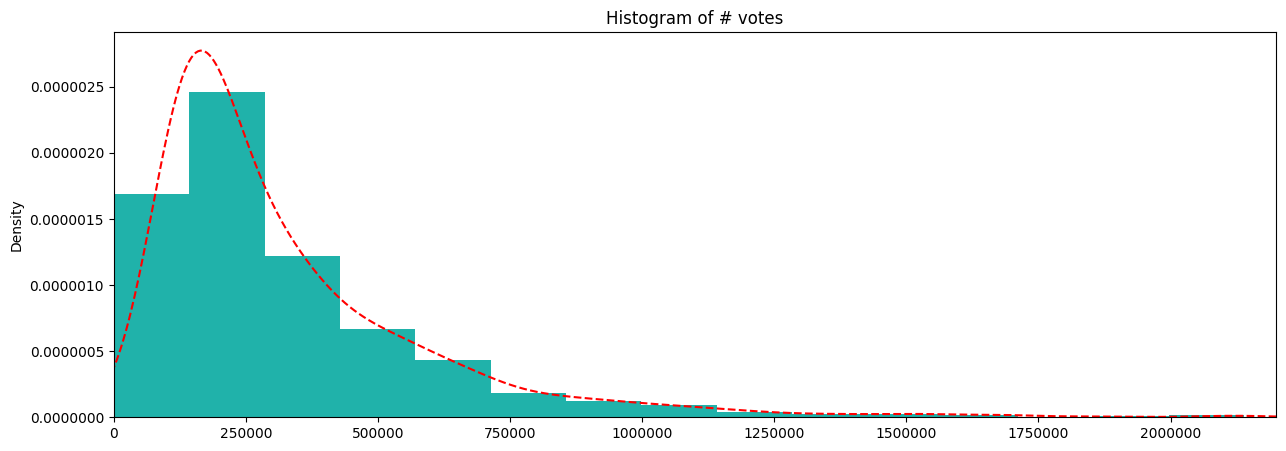

In [111]:
fig, ax = plt.subplots(1, figsize=(15, 5))
df['imdbVotes'].hist(ax=ax, bins=15, density=True, color='lightseagreen')
df['imdbVotes'].plot(ax=ax, kind='kde', xlim=(0, 2200000), style='r--')
ax.set_title('Histogram of # votes')

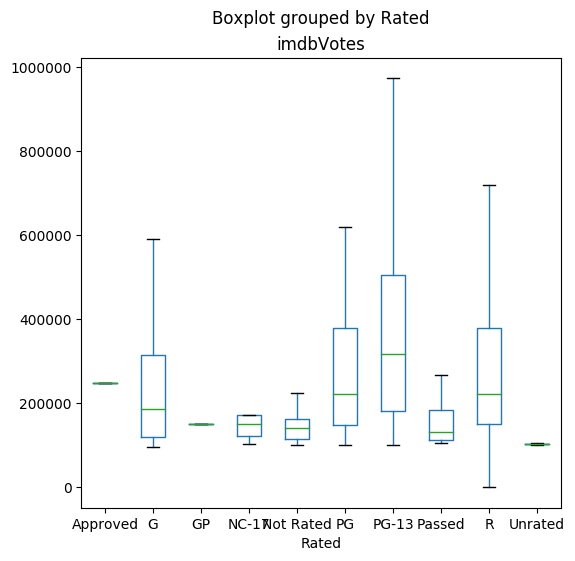

In [116]:
fig, ax = plt.subplots(1, figsize=(6, 6))
df.boxplot(column='imdbVotes', by='Rated', grid=False, ax=ax, sym='')

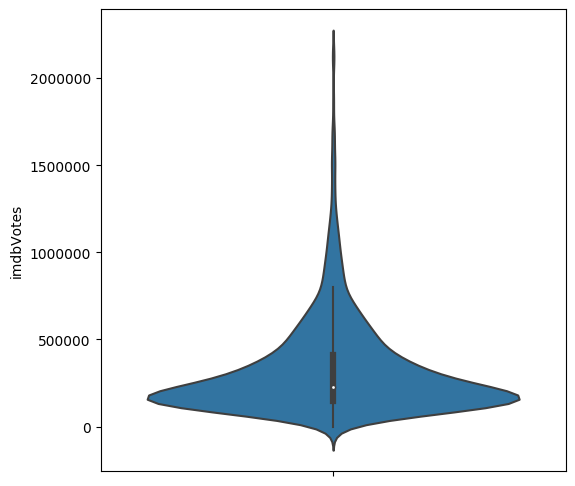

In [117]:
fig, ax = plt.subplots(1, figsize=(6, 6))
sns.violinplot(y=df['imdbVotes'], grid=False, ax=ax)

Text(0.5, 1.0, '# Votes by Year')

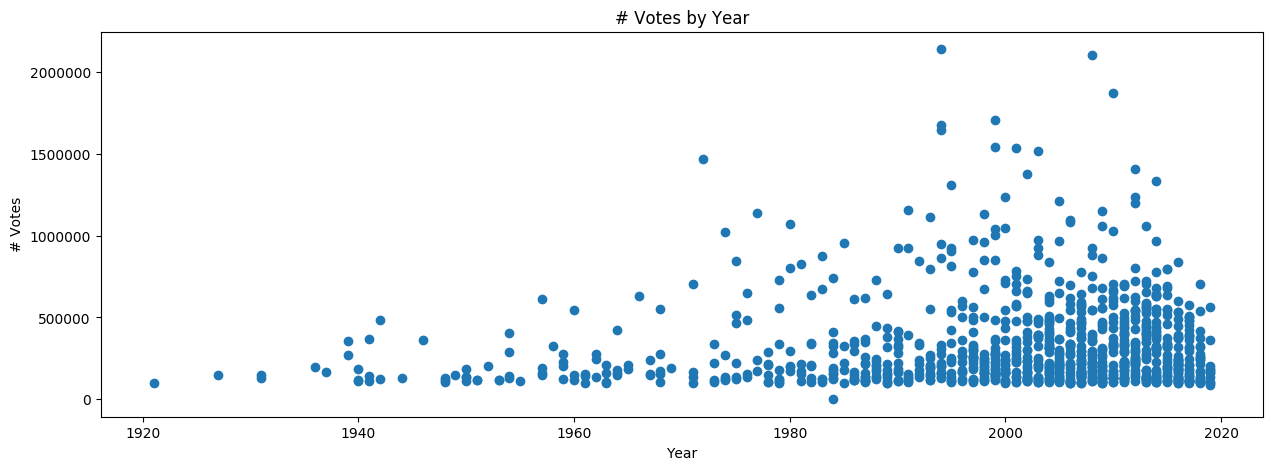

In [118]:
fig, ax = plt.subplots(1, figsize=(15, 5))
ax.scatter(x=df.Year, y=df.imdbVotes)
ax.set_ylabel('# Votes')
ax.set_xlabel('Year')
ax.set_title('# Votes by Year')

## Evaluation survey
Please, spend 1 minute answering these questions that can help us a lot on future workshops. 

https://go.ncsu.edu/dvs-eval

## Credits

This workshop was originally written by Simon Wiles, of Stanford Libraries, and co-taught with Scott Bailey at Stanford University. 